In [165]:
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
import re

# Identifying Driver Mutations that Predict Prognosis in Squamous Cell Carcinomas Using TCGA Data

## Data Incubator Capstone, Summer 2017, Eric Jaehnig

### Introduction

The Cancer Genome Atlas (TCGA) contains data from genomic (i.e., mutations, copy number aberrations), transcriptomic (gene expression), and proteomic (protein levels) analysis of human cancer samples from 150 studies (see http://www.cbioportal.org/faq.jsp). Associated with these large biological datasets are various types of clinical data describing characteristics of the patients from which the samples were obtained. For this project, I propose to use mutation data, the most abundant data type in TCGA, to identify potential cancer driver mutations for squamous cell carcinomas. Of the 150 datasets deposited in TCGA, 11 include mutations identified from whole genome or whole exome sequencing of 5 different types of squamous cell cell carcinomas from 2200 cancer patients. My goal is to determine if there is a set of common genes that is mutated in squamous cell cancers and to identify the cellular processes and pathways that these genes regulate. Since these genes likely drive carcinogenesis in squamous epithelial cells, drugs that target the pathways they are involved in could potentially be used to treat squamous cell cancers in the future. While a quick Pubmed search reveals that specific squamous cell carcinoma or broad pan-cancer analysis of TCGA data is common, I only found one study focused on one gene that involved pan-cancer analysis specifically for squamous cell cancers, lending credence to the novelty of the proposed project.

#### Data sources and preliminary analysis

I downloaded the datasets for each of the 5 squamous cell carcinomas: cervical, esophageal, head and neck, lung, and skin. I loaded the “data_mutations_extended.txt” files for each of the 11 datasets into R dataframes. Each row in these files contains a uniquely identified mutation (multiple mutations per patient, each of which occupies a separate row). I selected only columns that may be of potential use when populating the dataframes, including gene names, the specific nucleotide changes, the corresponding amino acid changes, and the impact that these changes are predicted to have on the gene’s function. Since some mutations are predicted to have little or no effect on function, I focused on genes for which the predicted impact is “medium” or “high”. I then determined the set of genes that were mutated for each of the 5 squamous cell cancers. 

Since cancer is marked by genomic instability, which can lead to passenger mutations in several genes that don’t contribute carcinogenesis, I decided to focus on genes that were more likely to be driver mutations that promote cancer progression. To do this, I generated the Venn diagram shown in Plot 1. This diagram shows how the 5 sets of genes overlap. My rationale for focusing on the set of genes that was mutated in all of the squamous cell carcinomas has two components. The first is that passenger mutations are more likely to be random, while driver mutations are more likely to occur more consistently; thus, focusing on genes mutated in all squamous cell carcinomas is a strategy for weeding out passenger mutations. The second is that my goal is to identify the mutated genes that drive squamous cell carcinogenesis in general, not specific types of squamous cell carcinomas. I found that there were approximately 16,000 unique genes mutated in head and neck cancer, ~14,000 in lung, ~12,000 in cervical cancer, ~4500 in esophageal cancer, and ~500 mutated in skin cancer. Of these genes, only 201 were mutated in all 5 cancers (center of Plot 1, download pdf here: https://agile-ocean-41073.herokuapp.com/).

Next, I evaluated this set of genes for cellular pathway (KEGG) enrichment because mutation of multiple genes in the same pathway suggests that the pathway plays an important role in carcinogenesis. 89 KEGG pathways showed statistically significant enrichment for genes mutated in all of the squamous cell cancers. I chose to analyze one of these, the second most significant pathway, more closely by plotting the mutated genes to pathway in Plot 2 (https://limitless-stream-36820.herokuapp.com/). The plot shows all of the genes in the pathway, EGFR tyrosine kinase inhibitor resistance, with the genes mutated in squamous cell cancers colored red. While most of these genes already have established roles in cancer, the fact that squamous cell cancers show such strong enrichment for mutations in genes involved in resistance to EGFR inhibitors suggests that these drugs may have limited efficacy in treating squamous cell carcinomas in the long-term. 

#### Proposed strategy for data analysis

More informative analysis of these genes is possible when considering the characteristics of the patient population, which is what I propose to do for the fellowship. Each dataset also contains a “data_clinical.txt” file that includes each patient’s age, sex, and disease status. Since the disease status field indicates whether the patient was disease-free or had cancer that either recurred or progressed when the studies were undertaken, machine learning approaches will be used to try classifying the set of mutated genes into genes associated with a good prognosis and into genes associated with poor prognosis. Genes that are associated with good prognosis may serve as biomarkers that could be used to predict response to treatment, while drugs that target genes associated with poor prognosis may provide improved outcomes for these patients. 

Finally, I will create a web-based app that will allow researchers to input their gene of interest and display the location of that gene in the Venn diagram above (Plot 1). The region of the Venn diagram in which the gene falls will be color coded to indicate that the gene was found to be mutated in the SCCs enclosing the region and whether it was found to be a predictor of prognosis (one color for good prognosis and another for poor prognosis). For example, FANCD2, is mutated in all of the SCC types except lung SCC, as can be seen at the end of this video: https://www.youtube.com/embed/p8C3DEN2Ah4



### Progress

Thus far, I used R to carry out the analysis. The wrangling and analysis was also performed solely on genomic data (mutated genes and specific mutations), while patient data will need to be added for the supervised machine learning studies. The R code has been deposited in the parent Github repository for this project (ejdna/capstone2/tcga.R). This R script also contains some basic unsupervised machine learning analysis (heirarchical and k-means clustering). This analysis was carried out at the level of the individual studies not at the level of individual patients, the latter being the more appropriate level and the focus of subsequent analysis. The dendrogram from the heirarchical clustering can be found here: ejdna/capstone2/Hclust_scc.jpeg, and pie charts showing the proportion of studies in different clusters from the k-means clustering for different values of k are generated as plots when the script is run (presuming all of the packages are properly updated, which may be a significant problem in itself). For subsequent analysis involving supervised machine learning, I will need to take advantage of the sklearn and TensorFlow packages in Python, which means 1) transferring the cleaned mutation data from R to Pandas and 2) transferring the patient data to Python and preparing it for the machine learning pipeline. 

#### Genomic mutation data

The following R script was used to write the cleaned dataframes from R to csv files: ejdna/capstone2/writeRdataframes2file.R (The <study>_Routput.csf files in this directory are the csv files generated by this script. These dataframes contain only columns that would be of potential interest for the proposed analysis and only rows containing mutations that are predicted to have moderate to high impact on the function of the mutated genes. The notations I used for the studies follows:
     
    Cervical SCC:      cervical  (unpublished TCGA data)
    Esophageal SCC:    esoph   (UCLA study, 2014)
                       esoph2  (ICGC study, 2014)
    Head and Neck SCC: hn   (Broad study, 2011)
                       hn2  (Hopkins study, 2011)
                       hn3  (MDA study, 2013)
                       hn4  (TCGA published data, 2015)
                       hn5  (unpublished TCGA data)
    Lung SCC:          lung  (TCGA published data, 2012)
                       lung2 (unpublished TCGA data)
    Skin SCC:          skin  (Dana Farber study, 2015)

Of these, only cervical, esoph2, hn3, hn4, hn5, lung2 and skin also have patient data files that contained the overall survival information needed for training and testing the supervised machine learning models. Thus, these are the datasets I will focus on going forward.


In [42]:
# load data from csv files into pandas
import pandas as pd
import numpy as np
import re

cervical_genomic_df = pd.read_csv("../cervical_Routput.csv")
cervical_genomic_df.head()

,Unnamed: 0,Gene,VariantClass,VariantType,SampleBC,MutStat,SeqSource,SampleID,DNAchange,ProteinChange,SIFT,PolyPhen,Impact
0,1,ABCA10,Missense_Mutation,SNP,TCGA-BI-A0VR-01,Somatic,WXS,dc62866c-0dc0-4ef5-bc63-fee1e943a99f,c.2823G>C,p.L941F,tolerated(0.47),benign(0.029),MODERATE
1,2,AIM1,Missense_Mutation,SNP,TCGA-BI-A0VR-01,Somatic,WXS,dc62866c-0dc0-4ef5-bc63-fee1e943a99f,c.1216G>C,p.E406Q,tolerated_low_confidence(0.1),benign(0.048),MODERATE
2,3,AK7,Missense_Mutation,SNP,TCGA-BI-A0VR-01,Somatic,WXS,dc62866c-0dc0-4ef5-bc63-fee1e943a99f,c.76G>T,p.D26Y,deleterious(0),probably_damaging(1),MODERATE
3,4,ANO9,Missense_Mutation,SNP,TCGA-BI-A0VR-01,Somatic,WXS,dc62866c-0dc0-4ef5-bc63-fee1e943a99f,c.292G>A,p.E98K,deleterious(0.02),benign(0.02),MODERATE
4,5,ARID4A,Missense_Mutation,SNP,TCGA-BI-A0VR-01,Somatic,WXS,dc62866c-0dc0-4ef5-bc63-fee1e943a99f,c.1525A>G,p.T509A,tolerated(0.26),benign(0.001),MODERATE


In [115]:
esoph2_genomic_df = pd.read_csv("../esoph2_Routput.csv")
esoph2_genomic_df.head()

,Unnamed: 0,Gene,VariantClass,VariantType,SampleBC,MutStat,SeqSource,SampleID,DNAchange,ProteinChange,SIFT,PolyPhen,Impact
0,1,CACNA1E,Missense_Mutation,SNP,ESCC-001T,Somatic,NaN,NaN,c.327G>T,p.E109D,deleterious(0.02),benign(0.217),MODERATE
1,2,SP140,Missense_Mutation,SNP,ESCC-001T,Somatic,NaN,NaN,c.934G>C,p.E312Q,deleterious(0.04),probably_damaging(0.974),MODERATE
2,3,PEX5L,Missense_Mutation,SNP,ESCC-001T,Somatic,NaN,NaN,c.64G>A,p.D22N,deleterious_low_confidence(0),benign(0.062),MODERATE
3,4,MATR3,Missense_Mutation,SNP,ESCC-001T,Somatic,NaN,NaN,c.1306G>A,p.E436K,tolerated(0.59),benign(0.013),MODERATE
4,5,ABCA13,Missense_Mutation,SNP,ESCC-001T,Somatic,NaN,NaN,c.847G>C,p.D283H,NaN,probably_damaging(0.917),MODERATE


In [4]:
hn3_genomic_df = pd.read_csv("../hn3_Routput.csv")
hn3_genomic_df.head()

,Unnamed: 0,Gene,VariantClass,VariantType,SampleBC,MutStat,SeqSource,SampleID,DNAchange,ProteinChange,SIFT,PolyPhen,Impact
0,1,A1BG,Missense_Mutation,SNP,OSCJM-PT01-166-T,Somatic,Capture,NaN,c.155A>G,p.H52R,tolerated(0.91),benign(0),MODERATE
1,2,ABCF3,Missense_Mutation,SNP,OSCJM-PT01-166-T,Somatic,Capture,NaN,c.1123T>C,p.S375P,deleterious(0),possibly_damaging(0.866),MODERATE
2,3,ACAD10,Missense_Mutation,SNP,OSCJM-PT01-166-T,Somatic,Capture,NaN,c.1259G>T,p.R420L,deleterious(0),benign(0.278),MODERATE
3,4,ACSF3,Missense_Mutation,SNP,OSCJM-PT01-166-T,Somatic,Capture,NaN,c.1114G>A,p.V372M,tolerated(0.1),possibly_damaging(0.631),MODERATE
4,5,ADAM21,Missense_Mutation,SNP,OSCJM-PT01-166-T,Somatic,Capture,NaN,c.214C>T,p.H72Y,tolerated(0.06),benign(0.107),MODERATE


In [88]:
hn4_genomic_df = pd.read_csv("../hn4_Routput.csv")
hn4_genomic_df.head()

,Unnamed: 0,Gene,VariantClass,VariantType,SampleBC,MutStat,SeqSource,SampleID,DNAchange,ProteinChange,SIFT,PolyPhen,Impact
0,1,SLC2A7,Missense_Mutation,SNP,TCGA-BA-4074-01-01-SM-1PNIE,Unknown,Unspecified,NaN,c.17C>A,p.A6E,tolerated(1),benign(0),MODERATE
1,2,VPS13D,Missense_Mutation,SNP,TCGA-BA-4074-01-01-SM-1PNIE,Unknown,Unspecified,NaN,c.10297A>T,p.I3433F,NaN,benign(0.076),MODERATE
2,3,SZT2,Missense_Mutation,SNP,TCGA-BA-4074-01-01-SM-1PNIE,Unknown,Unspecified,NaN,c.7898A>T,p.H2633L,deleterious(0.01),probably_damaging(0.997),MODERATE
3,4,LPHN2,Missense_Mutation,SNP,TCGA-BA-4074-01-01-SM-1PNIE,Unknown,Unspecified,NaN,c.2777C>A,p.A926D,deleterious(0),benign(0.169),MODERATE
4,5,ARHGAP29,Missense_Mutation,SNP,TCGA-BA-4074-01-01-SM-1PNIE,Unknown,Unspecified,NaN,c.2367G>C,p.W789C,tolerated(0.18),benign(0.006),MODERATE


In [6]:
hn5_genomic_df = pd.read_csv("../hn5_Routput.csv")
hn5_genomic_df.head()

,Unnamed: 0,Gene,VariantClass,VariantType,SampleBC,MutStat,SeqSource,SampleID,DNAchange,ProteinChange,SIFT,PolyPhen,Impact
0,1,ABCA13,Missense_Mutation,SNP,TCGA-4P-AA8J-01,Somatic,WXS,0fe5f8b2-c794-4c93-b2ab-0b544e366f5c,c.6639C>G,p.I2213M,[Not Available],possibly_damaging(0.453),MODERATE
1,2,ZMAT2,Missense_Mutation,SNP,TCGA-4P-AA8J-01,Somatic,WXS,0fe5f8b2-c794-4c93-b2ab-0b544e366f5c,c.363G>C,p.Q121H,deleterious(0),possibly_damaging(0.764),MODERATE
2,3,APPL2,Missense_Mutation,SNP,TCGA-4P-AA8J-01,Somatic,WXS,0fe5f8b2-c794-4c93-b2ab-0b544e366f5c,c.1261G>C,p.E421Q,tolerated(0.42),benign(0.011),MODERATE
3,4,LRSAM1,Missense_Mutation,SNP,TCGA-4P-AA8J-01,Somatic,WXS,0fe5f8b2-c794-4c93-b2ab-0b544e366f5c,c.825A>C,p.E275D,tolerated(0.51),benign(0.002),MODERATE
4,5,ZNF425,Missense_Mutation,SNP,TCGA-4P-AA8J-01,Somatic,WXS,0fe5f8b2-c794-4c93-b2ab-0b544e366f5c,c.276G>A,p.M92I,tolerated(0.07),benign(0),MODERATE


In [7]:
lung2_genomic_df = pd.read_csv("../lung2_Routput.csv")
lung2_genomic_df.head()

,Unnamed: 0,Gene,VariantClass,VariantType,SampleBC,MutStat,SeqSource,SampleID,DNAchange,ProteinChange,SIFT,PolyPhen,Impact
0,1,ANKFN1,Missense_Mutation,SNP,TCGA-18-3406-01,Somatic,Capture,d3320989-71fd-425b-933e-6e8528a016ed,c.840G>T,p.M280I,tolerated(0.4),benign(0.005),MODERATE
1,2,AGRN,Missense_Mutation,SNP,TCGA-18-3406-01,Somatic,Capture,d3320989-71fd-425b-933e-6e8528a016ed,c.2705C>T,p.A902V,tolerated(0.25),possibly_damaging(0.499),MODERATE
2,3,GLTPD1,Nonstop_Mutation,SNP,TCGA-18-3406-01,Somatic,Capture,d3320989-71fd-425b-933e-6e8528a016ed,c.645G>C,p.*215Yext*44,[Not Available],[Not Available],HIGH
3,4,ACTRT2,Missense_Mutation,SNP,TCGA-18-3406-01,Somatic,Capture,d3320989-71fd-425b-933e-6e8528a016ed,c.1095G>T,p.K365N,tolerated(0.16),benign(0.072),MODERATE
4,5,DCDC2B,Nonsense_Mutation,SNP,TCGA-18-3406-01,Somatic,Capture,d3320989-71fd-425b-933e-6e8528a016ed,c.689C>A,p.S230*,[Not Available],[Not Available],HIGH


In [135]:
skin_genomic_df = pd.read_csv("../skin_Routput.csv")
skin_genomic_df.head()

,Unnamed: 0,Gene,VariantClass,VariantType,SampleBC,MutStat,SeqSource,SampleID,DNAchange,ProteinChange,SIFT,PolyPhen,Impact
0,1,AFF3,Missense_Mutation,SNP,S00-28455-TP-NT,Somatic,WXS,S00-28455-TP,c.1082C>T,p.S361L,tolerated(0.12),benign(0.251),MODERATE
1,2,AGTR1,Missense_Mutation,SNP,S00-28455-TP-NT,Somatic,WXS,S00-28455-TP,c.377G>T,p.R126L,deleterious(0),probably_damaging(1),MODERATE
2,3,ARID2,Nonsense_Mutation,SNP,S00-28455-TP-NT,Somatic,WXS,S00-28455-TP,c.797G>A,p.W266*,NaN,NaN,HIGH
3,4,AXIN2,Missense_Mutation,SNP,S00-28455-TP-NT,Somatic,WXS,S00-28455-TP,c.290C>T,p.T97I,deleterious(0.01),benign(0.077),MODERATE
4,5,BRCA1,Missense_Mutation,SNP,S00-28455-TP-NT,Somatic,WXS,S00-28455-TP,c.3575C>T,p.P1192L,deleterious(0.02),benign(0.391),MODERATE


#### Patient Data

The patient data was also downloaded from TCGA and added to the notebook. The following code populates Pandas dataframes with the relevant data (chosen columns provide data that is in common to most or all of the datasets).

In [9]:
#Now get the correspending patient data for each dataset
#The patient data files are in the same directory as the R output files
cervical_patient_df = pd.read_table("../cervical_data_bcr_clinical_data_patient.txt", usecols = lambda x: x in [
                                                                                               "PATIENT_ID", 
                                                                                               "GENDER", 
                                                                                               "TOBACCO_SMOKING_HISTORY_INDICATOR", 
                                                                                               "SMOKING_YEAR_STARTED", 
                                                                                               "SMOKING_YEAR_STOPPED",
                                                                                               "SMOKING_PACK_YEARS",
                                                                                               "AGE",
                                                                                               "HISTOLOGICAL_DIAGNOSIS",
                                                                                               "GRADE",
                                                                                               "INITIAL_PATHOLOGIC_DX_YEAR", 
                                                                                               "AJCC_NODES_PATHOLOGIC_PN",
                                                                                               "AJCC_TUMOR_PATHOLOGIC_PT",
                                                                                               "AJCC_METASTASIS_PATHOLOGIC_PM",
                                                                                               "CLINICAL_STAGE", 
                                                                                               "TUMOR_TISSUE_SITE",
                                                                                               "OS_STATUS",
                                                                                               "OS_MONTHS",
                                                                                               "DFS_STATUS",
                                                                                               "DFS_MONTHS"],
                                   skiprows = 4)
cervical_patient_df.head()


,PATIENT_ID,GENDER,TOBACCO_SMOKING_HISTORY_INDICATOR,SMOKING_YEAR_STARTED,SMOKING_YEAR_STOPPED,SMOKING_PACK_YEARS,AGE,HISTOLOGICAL_DIAGNOSIS,GRADE,INITIAL_PATHOLOGIC_DX_YEAR,AJCC_NODES_PATHOLOGIC_PN,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_METASTASIS_PATHOLOGIC_PM,CLINICAL_STAGE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-4J-AA1J,FEMALE,1,[Not Available],[Not Available],[Not Available],31,Cervical Squamous Cell Carcinoma,G3,2013,N0,T1b2,M0,Stage IB2,Cervical,LIVING,17.81,DiseaseFree,17.81
1,TCGA-BI-A0VR,FEMALE,4,22,1995,20,53,Cervical Squamous Cell Carcinoma,G3,2006,N1,T2b,M0,Stage IIIB,Cervical,LIVING,49.44,DiseaseFree,49.44
2,TCGA-BI-A0VS,FEMALE,2,[Not Available],[Not Available],[Not Available],48,Cervical Squamous Cell Carcinoma,G3,2007,N0,T1b1,M0,Stage IB,Cervical,LIVING,57.00,DiseaseFree,57.00
3,TCGA-BI-A20A,FEMALE,[Not Available],[Not Available],[Not Available],[Not Available],49,Cervical Squamous Cell Carcinoma,G3,2010,N0,T1b1,M0,Stage IB1,Cervical,LIVING,23.65,DiseaseFree,23.65
4,TCGA-C5-A0TN,FEMALE,1,[Not Available],[Not Available],[Not Available],21,Cervical Squamous Cell Carcinoma,G3,1997,N1,T1b,MX,Stage IB2,Cervical,DECEASED,11.43,Recurred/Progressed,2.04


In [10]:
esoph2_patient_df = pd.read_table("../esoph2_data_clinical.txt", usecols = lambda x: x in  ["SAMPLE_ID",
                                                                                            "PATIENT_ID", 
                                                                                            "GENDER", 
                                                                                            "AGE",
                                                                                            "OS_STATUS",
                                                                                            "OS_MONTHS",
                                                                                            "TUMOR_STAGE",
                                                                                            "TNM",
                                                                                            "SMOKER",
                                                                                            "CANCER_TYPE_DETAILED"],
                                   skiprows = 5)
esoph2_patient_df.head()

,SAMPLE_ID,PATIENT_ID,GENDER,AGE,OS_STATUS,OS_MONTHS,TUMOR_STAGE,TNM,SMOKER,CANCER_TYPE_DETAILED
0,ESCC-001T,ESCC-001T,Male,74,LIVING,24.61,IIIA,T2N2M0,No,Esophageal Squamous Cell Carcinoma
1,ESCC-002T,ESCC-002T,Male,47,DECEASED,7.79,IIB,T2N0M0,Yes,Esophageal Squamous Cell Carcinoma
2,ESCC-003T,ESCC-003T,Female,54,LIVING,45.37,IIB,T2N1M0,No,Esophageal Squamous Cell Carcinoma
3,ESCC-004T,ESCC-004T,Male,60,DECEASED,15.41,IIB,T2N0M0,No,Esophageal Squamous Cell Carcinoma
4,ESCC-005T,ESCC-005T,Male,65,DECEASED,29.37,IIB,T2N0M0,Yes,Esophageal Squamous Cell Carcinoma


In [11]:
hn3_patient_df = pd.read_table("../hn3_data_clinical.txt", usecols = lambda x: x in    ["SAMPLE_ID",
                                                                                        "PATIENT_ID", 
                                                                                        "SEX",
                                                                                        "TUMOR_STAGE",
                                                                                        "AGE",
                                                                                        "NODAL_STAGE",
                                                                                        "NUMBER_OF_LYMPHNODES_POSITIVE",
                                                                                        "SMOKER",
                                                                                        "TOBACCO_SMOKING_HISTORY_INDICATOR",
                                                                                        "OS_STATUS",
                                                                                        "OS_MONTHS", 
                                                                                        "DFS_STATUS",
                                                                                        "DFS_MONTHS",
                                                                                        "CANCER_TYPE_DETAILED"],
                                   skiprows = 5)
hn3_patient_df.head()

,SAMPLE_ID,PATIENT_ID,SEX,TUMOR_STAGE,AGE,NODAL_STAGE,NUMBER_OF_LYMPHNODES_POSITIVE,SMOKER,TOBACCO_SMOKING_HISTORY_INDICATOR,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS,CANCER_TYPE_DETAILED
0,OSCJM-PT35-37-T,OSCJM-PT35-37,Male,T4,70,N2b,7,Yes,Yes,DECEASED,6.9,Recurred/Progressed,6.3,Head and Neck Squamous Cell Carcinoma
1,OSCJM-PT07-43-T,OSCJM-PT07-43,Male,T4,50,N2b,2,Yes,Yes,LIVING,51.1,Diseasefree,48.6,Head and Neck Squamous Cell Carcinoma
2,OSCJM-PT05-91-T,OSCJM-PT05-91,Male,T3,41,N1,1,Yes,Yes,LIVING,110.8,Diseasefree,1.4,Head and Neck Squamous Cell Carcinoma
3,OSCJM-PTC-139-T,OSCJM-PTC-139,Male,T3,78,N1,1,No,No,DECEASED,10.8,Recurred/Progressed,9.7,Head and Neck Squamous Cell Carcinoma
4,OSCJM-PT01-166-T,OSCJM-PT01-166,Male,T3,63,N0,0,Yes,Yes,LIVING,40.9,Diseasefree,39.0,Head and Neck Squamous Cell Carcinoma


In [12]:
hn4_patient_df = pd.read_table("../hn4_data_clinical.txt", usecols = lambda x: x in    ["SAMPLE_ID",
                                                                                        "PATIENT_ID",
                                                                                        "OS_STATUS",
                                                                                        "OS_MONTHS", 
                                                                                        "CANCER_TYPE_DETAILED"],
                                   skiprows = 5)
hn4_patient_df.head()

,SAMPLE_ID,PATIENT_ID,OS_STATUS,OS_MONTHS,CANCER_TYPE_DETAILED
0,TCGA-BA-4074-01,TCGA-BA-4074-01,DECEASED,15.15,Head and Neck Squamous Cell Carcinoma
1,TCGA-BA-4076-01,TCGA-BA-4076-01,DECEASED,13.63,Head and Neck Squamous Cell Carcinoma
2,TCGA-BA-4078-01,TCGA-BA-4078-01,DECEASED,9.07,Head and Neck Squamous Cell Carcinoma
3,TCGA-BA-5149-01,TCGA-BA-5149-01,LIVING,8.15,Head and Neck Squamous Cell Carcinoma
4,TCGA-BA-5151-01,TCGA-BA-5151-01,LIVING,6.24,Head and Neck Squamous Cell Carcinoma


In [13]:
hn5_patient_df = pd.read_table("../hn5_data_bcr_clinical_data_patient.txt", usecols = lambda x: x in ["PATIENT_ID",  
                                                                                                      "HISTOLOGICAL_DIAGNOSIS",
                                                                                                      "GENDER",
                                                                                                      "LYMPH_NODES_EXAMINED_HE_COUNT",
                                                                                                      "AJCC_TUMOR_PATHOLOGIC_PT",
                                                                                                      "AJCC_NODES_PATHOLOGIC_PN",
                                                                                                      "AJCC_METASTASIS_PATHOLOGIC_PM",
                                                                                                      "AJCC_PATHOLOGIC_TUMOR_STAGE",
                                                                                                      "GRADE",
                                                                                                      "TOBACCO_SMOKING_HISTORY_INDICATOR", 
                                                                                                      "SMOKING_YEAR_STARTED", 
                                                                                                      "SMOKING_YEAR_STOPPED",
                                                                                                      "SMOKING_PACK_YEARS",
                                                                                                      "AGE",
                                                                                                      "CLIN_M_STAGE",
                                                                                                      "CLIN_N_STAGE",
                                                                                                      "CLIN_T_STAGE",
                                                                                                      "CLINICAL_STAGE", 
                                                                                                      "TUMOR_TISSUE_SITE",
                                                                                                      "OS_STATUS",
                                                                                                      "OS_MONTHS",
                                                                                                      "DFS_STATUS",
                                                                                                      "DFS_MONTHS"],
                            skiprows = 4)
hn5_patient_df.head()

,PATIENT_ID,HISTOLOGICAL_DIAGNOSIS,GENDER,LYMPH_NODES_EXAMINED_HE_COUNT,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_PATHOLOGIC_TUMOR_STAGE,GRADE,TOBACCO_SMOKING_HISTORY_INDICATOR,...,AGE,CLIN_M_STAGE,CLIN_N_STAGE,CLIN_T_STAGE,CLINICAL_STAGE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-BA-4074,Head & Neck Squamous Cell Carcinoma,MALE,5,T2,N2c,M0,Stage IVA,G3,2,...,69,M0,N2c,T3,Stage IVA,Head and Neck,DECEASED,15.18,Recurred/Progressed,13.01
1,TCGA-BA-4075,Head & Neck Squamous Cell Carcinoma,MALE,0,T3,N0,M0,Stage III,G2,2,...,49,M0,N1,T4a,Stage IVA,Head and Neck,DECEASED,9.30,Recurred/Progressed,7.75
2,TCGA-BA-4076,Head & Neck Squamous Cell Carcinoma,MALE,[Not Available],TX,NX,[Not Available],[Not Available],G2,2,...,39,M0,N2c,T3,Stage IVA,Head and Neck,DECEASED,13.63,Recurred/Progressed,9.40
3,TCGA-BA-4077,Head & Neck Squamous Cell Carcinoma,FEMALE,[Not Available],T4a,N0,M0,Stage IVA,G2,4,...,45,M0,N3,T4b,Stage IVB,Head and Neck,DECEASED,37.25,[Not Available],[Not Available]
4,TCGA-BA-4078,Head & Neck Squamous Cell Carcinoma,MALE,4,[Not Available],[Not Available],[Not Available],[Not Available],G2,4,...,83,M0,N2a,T2,Stage IVA,Head and Neck,DECEASED,9.07,[Not Available],[Not Available]


In [14]:
lung2_patient_df = pd.read_table("../lung2_data_bcr_clinical_data_patient.txt", usecols = lambda x: x in ["PATIENT_ID",  
                                                                                                          "HISTOLOGICAL_DIAGNOSIS",
                                                                                                          "GENDER",
                                                                                                          "INITIAL_PATHOLOGIC_DX_YEAR",
                                                                                                          "AJCC_TUMOR_PATHOLOGIC_PT",
                                                                                                          "AJCC_NODES_PATHOLOGIC_PN",
                                                                                                          "AJCC_METASTASIS_PATHOLOGIC_PM",
                                                                                                          "AJCC_PATHOLOGIC_TUMOR_STAGE",
                                                                                                          "TOBACCO_SMOKING_HISTORY_INDICATOR", 
                                                                                                          "SMOKING_YEAR_STARTED", 
                                                                                                          "SMOKING_YEAR_STOPPED",
                                                                                                          "SMOKING_PACK_YEARS",
                                                                                                          "GRADE",
                                                                                                          "AGE",
                                                                                                          "TUMOR_TISSUE_SITE",
                                                                                                          "OS_STATUS",
                                                                                                          "OS_MONTHS",
                                                                                                          "DFS_STATUS",
                                                                                                          "DFS_MONTHS"],
                            skiprows = 4)
lung2_patient_df.head()

,PATIENT_ID,HISTOLOGICAL_DIAGNOSIS,GENDER,INITIAL_PATHOLOGIC_DX_YEAR,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_PATHOLOGIC_TUMOR_STAGE,TOBACCO_SMOKING_HISTORY_INDICATOR,SMOKING_YEAR_STARTED,SMOKING_YEAR_STOPPED,SMOKING_PACK_YEARS,AGE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-18-3407,Lung Squamous Cell Carcinoma,MALE,2003,T2,N0,M0,Stage IB,3,[Not Available],1988,40,72,Lung,DECEASED,4.47,[Not Available],[Not Available]
1,TCGA-18-3408,Lung Squamous Cell Carcinoma,FEMALE,2004,T2,N0,M0,Stage IB,4,[Not Available],2004,30,77,Lung,DECEASED,75.69,Recurred/Progressed,58.90
2,TCGA-18-3409,Lung Squamous Cell Carcinoma,MALE,2004,T1,N0,M0,Stage IA,3,[Not Available],1974,20,74,Lung,LIVING,123.09,Recurred/Progressed,75.26
3,TCGA-18-3410,Lung Squamous Cell Carcinoma,MALE,2004,T3,N0,M0,Stage IIB,3,[Not Available],[Not Available],[Not Available],81,Lung,DECEASED,4.80,[Not Available],[Not Available]
4,TCGA-18-3411,Lung Squamous Cell Carcinoma,FEMALE,2005,T2,N2,M0,Stage IIIA,2,[Not Available],[Not Available],50,63,Lung,LIVING,117.48,DiseaseFree,117.48


In [99]:
skin_patient_df = pd.read_table("../skin_patient_data_clinical.txt", usecols = lambda x: x in  ["SAMPLE_ID",
                                                                                        "PATIENT_ID",
                                                                                        "AGE",
                                                                                        "GENDER", 
                                                                                        "SMOKER",
                                                                                        "DFS_STATUS",
                                                                                        "OS_STATUS",
                                                                                        "PFS_MONTHS"
                                                                                        "OS_MONTHS",
                                                                                        "CANCER_TYPE_DETAILED"],
                                   skiprows = 5)
skin_patient_df.head()

,SAMPLE_ID,PATIENT_ID,AGE,GENDER,SMOKER,DFS_STATUS,OS_STATUS,CANCER_TYPE_DETAILED
0,S00-28455-TP-NT,S00-28455,73,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
1,S00-35182-TP-NT,S00-35182,84,Male,Yes,DiseaseFree,DECEASED,Cutaneous Squamous Cell Carcinoma
2,S01-27743-TP-NT,S01-27743,72,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
3,S02-14875,S02-14785,48,Male,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
4,S02-15015-TP-S00-35182-NT,S02-15015,75,Male,Yes,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma


#### Prepping the data for the machine learning pipeline

The previous data analysis done in R was done using mutation data that was transposed and flattened across the study. That is, for each study, a column was provided in the dataframe for each of the genes mutated in all of the datasets and a value of 1, if the mutation was identified in the study, or 0, if not, was assigned to that gene for that study. However, to employ machine learning, I need to transpose and flatten over each patient in each study since each patient has a different clinical outcome, which is what I am trying to predict. 

The following code flattens each genomic dataframe as follows:

patient_ID (this needs to be extracted from barcode ID) | gene1_impact(0 for not mutated, 1 for moderate, and 2 for high) | gene2_impact | ...

Thus, the mutation status of each gene is a feature in the matrix used for machine learning.

In [81]:
#first extract patient ID from barcode id and replace barcode id with patient id
cervical_genomic_df['SampleBC'] = cervical_genomic_df['SampleBC'].map(lambda x: re.sub('\-\d\d$', '', x))
cervical_genomic_df = cervical_genomic_df.rename(columns={'SampleBC': 'PATIENT_ID'})

#make this into a function and iterate over all the datasets
def ReplaceBCwithPATIENT_ID(gen_df):
    if 'SampleBC' in gen_df.columns:
        gen_df['SampleBC'] = gen_df['SampleBC'].map(lambda x: re.sub('\-\d\d$', '', x))
        gen_df = gen_df.rename(columns={'SampleBC': 'PATIENT_ID'})
    return gen_df

In [ ]:
#for esoph2, patient ID and Sample BC are identical
esoph2_genomic_df = esoph2_genomic_df.rename(columns={'SampleBC': 'PATIENT_ID'})

#for hn3 Sample BC is identical to Sample ID in the patient df >> drop Patient ID from the patient df and replace with Sample ID
del hn3_patient_df['PATIENT_ID']
hn3_patient_df = hn3_patient_df.rename(columns={'SAMPLE_ID': 'PATIENT_ID'})
hn3_genomic_df = hn3_genomic_df.rename(columns={'SampleBC': 'PATIENT_ID'})

#hn4 is a special case
hn4_genomic_df['SampleBC'] = hn4_genomic_df['SampleBC'].map(lambda x: re.sub('\-\d\d\-\w\w\-\w\w\w\w\w$', '', x))
hn4_genomic_df = hn4_genomic_df.rename(columns={'SampleBC': 'PATIENT_ID'})

#for hn5, lung2 use the function
hn5_genomic_df = ReplaceBCwithPATIENT_ID(hn5_genomic_df)
lung2_genomic_df = ReplaceBCwithPATIENT_ID(lung2_genomic_df)

#skin is a special case where skin_genomic_df.SampleBC is identical to skin_patient_df.SAMPLE_ID >> use this for the joing instead


In [76]:
#generate dataframe containing patient_IDs and dictionaries of mutated genes for each patient (as 1's for use by DictVectorize)
#cervical_genes = set(cervical_genomic_df.Gene)
cervical_patients = set(cervical_genomic_df.PATIENT_ID)

def PatientGenes(genomic_df, pt):
    criterion = genomic_df['PATIENT_ID'].map(lambda x: x==pt)
    gList = []
    for it in genomic_df[criterion].Gene: gList.append(it)
    return gList

def GeneDictEncoder(gene_list):
    gene_dict = {}
    for gene in gene_list:
        gene_dict[gene] = 1
    return gene_dict
    
pt_genedict_list=[]
for pt in cervical_patients:
    pt_genedict_list.append((pt, GeneDictEncoder(PatientGenes(cervical_genomic_df, pt))))
cervical_genesInDict_df = pd.DataFrame(pt_genedict_list, columns=["PATIENT_ID","MUTATED_GENES"])

cervical_complete_df = pd.merge(cervical_genesInDict_df, cervical_patient_df, on='PATIENT_ID')

In [409]:
#turn this into a function
def MakeGeneDictDF(gen_df1, pt_list):
    genedict_list=[]
    for pt in pt_list:
        genedict_list.append((pt, GeneDictEncoder(PatientGenes(gen_df1, pt))))
    return pd.DataFrame(genedict_list, columns=["PATIENT_ID","MUTATED_GENES"])

#repeat for esoph2
esoph2_patients = set(esoph2_genomic_df.PATIENT_ID)
esoph2_genesAsDict_df = MakeGeneDictDF(esoph2_genomic_df, esoph2_patients)
esoph2_complete_df = pd.merge(esoph2_genesAsDict_df, esoph2_patient_df, on='PATIENT_ID')

In [126]:
#hn3
hn3_patients = set(hn3_genomic_df.PATIENT_ID)
hn3_genesAsDict_df = MakeGeneDictDF(hn3_genomic_df, hn3_patients)
hn3_complete_df = pd.merge(hn3_genesAsDict_df, hn3_patient_df, on='PATIENT_ID')
hn3_complete_df

,PATIENT_ID,MUTATED_GENES,SEX,TUMOR_STAGE,AGE,NODAL_STAGE,NUMBER_OF_LYMPHNODES_POSITIVE,SMOKER,TOBACCO_SMOKING_HISTORY_INDICATOR,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS,CANCER_TYPE_DETAILED
0,OSCJM-PT27-562-T,"{u'AMOTL1': 1, u'HOXD9': 1, u'KIAA1257': 1, u'...",Female,T2,61,N2b,3,Yes,Yes,LIVING,17.3,Diseasefree,9.4,Head and Neck Squamous Cell Carcinoma
1,OSCJM-PT05-91-T,"{u'USP8': 1, u'EPHX2': 1, u'TNFAIP6': 1, u'ACE...",Male,T3,41,N1,1,Yes,Yes,LIVING,110.8,Diseasefree,1.4,Head and Neck Squamous Cell Carcinoma
2,OSCJM-PT04-447-T,"{u'ZDHHC16': 1, u'ZCCHC14': 1, u'DOCK3': 1, u'...",Male,T3,26,N1,1,No,No,LIVING,45.5,Diseasefree,43.2,Head and Neck Squamous Cell Carcinoma
3,OSCJM-PT45-364-T,"{u'PCK2': 1, u'CDH10': 1, u'TP63': 1, u'INPP5K...",Male,T4,74,N0,0,Yes,Yes,LIVING,49.5,Diseasefree,49.0,Head and Neck Squamous Cell Carcinoma
4,OSCJM-PTA-367-T,"{u'OR6C76': 1, u'CDH16': 1, u'ACTC1': 1, u'ALG...",Male,T3,66,N2b,3,No,Yes,LIVING,47.0,Diseasefree,45.1,Head and Neck Squamous Cell Carcinoma
5,OSCJM-PT35-37-T,"{u'FBXO18': 1, u'LGR6': 1, u'CRKL': 1, u'KIAA2...",Male,T4,70,N2b,7,Yes,Yes,DECEASED,6.9,Recurred/Progressed,6.3,Head and Neck Squamous Cell Carcinoma
6,OSCJM-PT50-575-T,"{u'AOC1': 1, u'CYP2J2': 1, u'MYO3B': 1, u'RYR2...",Male,T4,66,N2c,5,Yes,Yes,DECEASED,28.3,Recurred/Progressed,26.4,Head and Neck Squamous Cell Carcinoma
7,OSCJM-PT25-327-T,"{u'EPS15': 1, u'ZBTB1': 1, u'TMEM200A': 1, u'K...",Male,T3,53,N1,1,Yes,Yes,LIVING,36.2,Diseasefree,34.3,Head and Neck Squamous Cell Carcinoma
8,OSCJM-PT15-391-T,"{u'OR6C76': 1, u'ANTXR1': 1, u'DTX2': 1, u'ANO...",Male,T4,75,N2c,3,Yes,Yes,DECEASED,83.4,Recurred/Progressed,81.7,Head and Neck Squamous Cell Carcinoma
9,OSCJM-PT40-169-T,"{u'MDN1': 1, u'ZNF630': 1, u'HIST1H4E': 1, u'G...",Female,T4,57,N2b,2,Yes,Yes,LIVING,143.1,Recurred/Progressed,140.9,Head and Neck Squamous Cell Carcinoma


In [127]:
#hn4
hn4_patients = set(hn4_genomic_df.PATIENT_ID)
hn4_genesAsDict_df = MakeGeneDictDF(hn4_genomic_df, hn4_patients)
hn4_complete_df = pd.merge(hn4_genesAsDict_df, hn4_patient_df, on='PATIENT_ID')
hn4_complete_df


,PATIENT_ID,MUTATED_GENES,SAMPLE_ID,OS_STATUS,OS_MONTHS,CANCER_TYPE_DETAILED
0,TCGA-DQ-5625-01,"{u'ORAOV1': 1, u'RPGR': 1, u'HUWE1': 1, u'SBF1...",TCGA-DQ-5625-01,LIVING,34.76,Head and Neck Squamous Cell Carcinoma
1,TCGA-CN-4730-01,"{u'AVPR1A': 1, u'TM7SF3': 1, u'RAET1L': 1, u'C...",TCGA-CN-4730-01,LIVING,11.27,Head and Neck Squamous Cell Carcinoma
2,TCGA-BA-5149-01,"{u'ZDBF2': 1, u'WLS': 1, u'MC2R': 1, u'FBXO15'...",TCGA-BA-5149-01,LIVING,8.15,Head and Neck Squamous Cell Carcinoma
3,TCGA-CV-5436-01,"{u'ANGPTL4': 1, u'SALL3': 1, u'MARCH6': 1, u'L...",TCGA-CV-5436-01,DECEASED,19.19,Head and Neck Squamous Cell Carcinoma
4,TCGA-CV-5966-01,"{u'ZCCHC12': 1, u'DNAH10': 1, u'C16orf11': 1, ...",TCGA-CV-5966-01,DECEASED,17.91,Head and Neck Squamous Cell Carcinoma
5,TCGA-CR-6467-01,"{u'TBC1D3B': 1, u'TTLL2': 1, u'RPL4': 1, u'TCE...",TCGA-CR-6467-01,NaN,NaN,Head and Neck Squamous Cell Carcinoma
6,TCGA-CV-6436-01,"{u'GCM2': 1, u'KRTAP5-4': 1, u'HSD17B11': 1, u...",TCGA-CV-6436-01,LIVING,24.41,Head and Neck Squamous Cell Carcinoma
7,TCGA-CV-7418-01,"{u'MYH10': 1, u'HECTD1': 1, u'ZRANB3': 1, u'TG...",TCGA-CV-7418-01,NaN,NaN,Head and Neck Squamous Cell Carcinoma
8,TCGA-CN-6998-01,"{u'BCL2L1': 1, u'PDGFRB': 1, u'NBPF9': 1, u'ZN...",TCGA-CN-6998-01,LIVING,1.51,Head and Neck Squamous Cell Carcinoma
9,TCGA-CV-7263-01,"{u'KRT39': 1, u'HIST1H4B': 1, u'ZCCHC11': 1, u...",TCGA-CV-7263-01,NaN,NaN,Head and Neck Squamous Cell Carcinoma


In [129]:
#hn5
hn5_patients = set(hn5_genomic_df.PATIENT_ID)
hn5_genesAsDict_df = MakeGeneDictDF(hn5_genomic_df, hn5_patients)
hn5_complete_df = pd.merge(hn5_genesAsDict_df, hn5_patient_df, on='PATIENT_ID')
hn5_complete_df

,PATIENT_ID,MUTATED_GENES,HISTOLOGICAL_DIAGNOSIS,GENDER,LYMPH_NODES_EXAMINED_HE_COUNT,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_PATHOLOGIC_TUMOR_STAGE,GRADE,...,AGE,CLIN_M_STAGE,CLIN_N_STAGE,CLIN_T_STAGE,CLINICAL_STAGE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-CQ-A4CG,"{u'SFTPD': 1, u'KLHL26': 1, u'DMD': 1, u'SLC9B...",Head & Neck Squamous Cell Carcinoma,FEMALE,0,T3,N0,M0,Stage III,G2,...,78,M0,N0,T2,Stage II,Head and Neck,DECEASED,14.13,Recurred/Progressed,11.50
1,TCGA-CV-7180,"{u'OBSCN': 1, u'LGR4': 1, u'DOCK9': 1, u'EMCN'...",Head & Neck Squamous Cell Carcinoma,MALE,0,T2,NX,[Not Available],Stage II,G2,...,34,M0,N0,T2,Stage II,Head and Neck,DECEASED,10.74,[Not Available],[Not Available]
2,TCGA-CQ-A4CE,"{u'WBSCR27': 1, u'HDAC5': 1, u'OR9A4': 1, u'CR...",Head & Neck Squamous Cell Carcinoma,FEMALE,0,T2,N0,M0,Stage II,G2,...,76,M0,N0,T2,Stage II,Head and Neck,LIVING,29.47,DiseaseFree,29.47
3,TCGA-CQ-A4CD,"{u'TRIM14': 1, u'TMCO2': 1, u'STK11': 1, u'IQC...",Head & Neck Squamous Cell Carcinoma,MALE,0,T4a,N0,M0,Stage IVA,G3,...,69,M0,N0,T4b,Stage IVB,Head and Neck,LIVING,33.57,DiseaseFree,33.57
4,TCGA-CQ-A4CB,"{u'CRLF3': 1, u'USH2A': 1, u'HUWE1': 1, u'HPS5...",Head & Neck Squamous Cell Carcinoma,MALE,1,T1,N1,M0,Stage III,G2,...,59,M0,N0,T2,Stage II,Head and Neck,LIVING,29.34,DiseaseFree,29.34
5,TCGA-CQ-A4CA,"{u'SSPN': 1, u'SYTL4': 1, u'SYNM': 1, u'PHF11'...",Head & Neck Squamous Cell Carcinoma,MALE,0,T2,N0,M0,Stage II,G2,...,[Not Available],M0,N0,T2,Stage II,Head and Neck,LIVING,[Not Available],DiseaseFree,[Not Available]
6,TCGA-BA-5151,"{u'SCFD1': 1, u'USP17L2': 1, u'HMX3': 1, u'FBX...",Head & Neck Squamous Cell Carcinoma,MALE,0,T4a,N0,[Not Available],Stage IVA,G1,...,72,M0,N0,T4a,Stage IVA,Head and Neck,LIVING,23.72,Recurred/Progressed,16.98
7,TCGA-BA-5153,"{u'RECK': 1, u'MYH9': 1, u'ERBB2IP': 1, u'DRD2...",Head & Neck Squamous Cell Carcinoma,MALE,[Not Available],T2,NX,[Not Available],[Not Available],G2,...,51,M0,N1,T2,Stage III,Head and Neck,DECEASED,57.88,Recurred/Progressed,53.09
8,TCGA-BA-5152,"{u'C17orf75': 1, u'CACNB2': 1, u'JPH1': 1, u'O...",Head & Neck Squamous Cell Carcinoma,MALE,0,T4a,N0,M0,Stage IVA,G2,...,56,M0,N0,T4a,Stage IVA,Head and Neck,LIVING,42.31,DiseaseFree,42.31
9,TCGA-BB-A6UO,"{u'KIAA1549': 1, u'HSPA4': 1, u'HUWE1': 1, u'C...",Head & Neck Squamous Cell Carcinoma,FEMALE,[Not Available],T4a,N2b,MX,Stage IVA,G2,...,61,MX,N2,T3,Stage IVA,Head and Neck,DECEASED,8.80,Recurred/Progressed,6.96


In [130]:
#lung2
lung2_patients = set(lung2_genomic_df.PATIENT_ID)
lung2_genesAsDict_df = MakeGeneDictDF(lung2_genomic_df, lung2_patients)
lung2_complete_df = pd.merge(lung2_genesAsDict_df, lung2_patient_df, on='PATIENT_ID')
lung2_complete_df

,PATIENT_ID,MUTATED_GENES,HISTOLOGICAL_DIAGNOSIS,GENDER,INITIAL_PATHOLOGIC_DX_YEAR,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_PATHOLOGIC_TUMOR_STAGE,TOBACCO_SMOKING_HISTORY_INDICATOR,SMOKING_YEAR_STARTED,SMOKING_YEAR_STOPPED,SMOKING_PACK_YEARS,AGE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-22-4607,"{u'ZNF337': 1, u'AGL': 1, u'OR4K1': 1, u'CUEDC...",Lung Squamous Cell Carcinoma,MALE,2003,T2a,N0,M0,Stage IB,3,1948,1968,20,75,Lung,DECEASED,19.28,[Not Available],[Not Available]
1,TCGA-22-4604,"{u'SLC6A3': 1, u'LTB4R2': 1, u'GNA13': 1, u'UN...",Lung Squamous Cell Carcinoma,MALE,2003,T2a,N1,M0,Stage IIA,2,[Not Available],[Not Available],50,73,Lung,DECEASED,13.11,Recurred/Progressed,10.05
2,TCGA-22-4601,"{u'ZDHHC15': 1, u'OR52B6': 1, u'KLK6': 1, u'HE...",Lung Squamous Cell Carcinoma,FEMALE,2003,T4,N0,M0,Stage IIIA,2,[Not Available],[Not Available],60,73,Lung,DECEASED,34.72,Recurred/Progressed,17.25
3,TCGA-85-6175,"{u'HSPA5': 1, u'KLHL22': 1, u'MCF2': 1, u'SORC...",Lung Squamous Cell Carcinoma,FEMALE,2010,T3,N0,M0,Stage IIB,1,[Not Available],[Not Available],[Not Available],63,Lung,DECEASED,9.66,[Not Available],[Not Available]
4,TCGA-60-2715,"{u'IL1RL2': 1, u'ZRANB2': 1, u'PKP4': 1, u'IGS...",Lung Squamous Cell Carcinoma,MALE,2008,T1,N0,M0,Stage IA,4,1983,2006,25,51,Lung,DECEASED,35.32,[Not Available],[Not Available]
5,TCGA-66-2734,"{u'SYTL4': 1, u'HECTD1': 1, u'GFRAL': 1, u'ACS...",Lung Squamous Cell Carcinoma,FEMALE,2005,T2,N0,M0,Stage IB,4,1965,2005,40,62,Lung,LIVING,43.07,DiseaseFree,43.07
6,TCGA-43-6143,"{u'HIF3A': 1, u'ZNF609': 1, u'PCSK2': 1, u'CTT...",Lung Squamous Cell Carcinoma,MALE,2010,T2,N0,M0,Stage IB,4,1953,2010,114,70,Lung,LIVING,22.96,DiseaseFree,22.96
7,TCGA-66-2756,"{u'TCTN1': 1, u'ZDHHC11': 1, u'SCG2': 1, u'UBA...",Lung Squamous Cell Carcinoma,MALE,2007,T4,N0,M0,Stage IIIB,4,1962,2002,[Not Available],68,Lung,LIVING,0.99,DiseaseFree,0.99
8,TCGA-66-2758,"{u'USH2A': 1, u'TEP1': 1, u'DDX56': 1, u'PCSK1...",Lung Squamous Cell Carcinoma,MALE,2007,T2,N0,M0,Stage IB,4,1951,2007,56,71,Lung,LIVING,20.99,DiseaseFree,20.99
9,TCGA-33-4566,"{u'ERRFI1': 1, u'ZCCHC11': 1, u'SMARCC1': 1, u...",Lung Squamous Cell Carcinoma,MALE,1996,T2,N0,M0,Stage IB,2,[Not Available],[Not Available],20,40,Lung,DECEASED,173.69,[Not Available],[Not Available]


In [138]:
#skin
def PatientGenesAdj(genomic_df, pt):
    criterion = genomic_df['SampleBC'].map(lambda x: x==pt)
    gList = []
    for it in genomic_df[criterion].Gene: gList.append(it)
    return gList

def MakeGeneDictDFAdj(gen_df1, pt_list):
    genedict_list=[]
    for pt in pt_list:
        genedict_list.append((pt, GeneDictEncoder(PatientGenesAdj(gen_df1, pt))))
    return pd.DataFrame(genedict_list, columns=["SampleBC","MUTATED_GENES"])

skin_patients = set(skin_genomic_df.SampleBC)
skin_genesAsDict_df = MakeGeneDictDFAdj(skin_genomic_df, skin_patients)
skin_complete_df = pd.merge(skin_genesAsDict_df, skin_patient_df, left_on='SampleBC', right_on='SAMPLE_ID')
skin_complete_df

,SampleBC,MUTATED_GENES,SAMPLE_ID,PATIENT_ID,AGE,GENDER,SMOKER,DFS_STATUS,OS_STATUS,CANCER_TYPE_DETAILED
0,S09-2518-TP-S12-11594-NT,"{u'KIAA1549': 1, u'SRC': 1, u'EPHA7': 1, u'HLA...",S09-2518-TP-S12-11594-NT,S09-2518,76,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
1,S10-24679-TP-NT,"{u'ATM': 1, u'EGFR': 1, u'CHEK1': 1, u'PRKDC':...",S10-24679-TP-NT,S10-24679,70,Male,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
2,S06-19548-TP-NT,"{u'KIAA1549': 1, u'TBX22': 1, u'RET': 1, u'EPH...",S06-19548-TP-NT,S06-19548,67,Male,Yes,Recurred/Progressed,DECEASED,Cutaneous Squamous Cell Carcinoma
3,S05-31806-TP-NT,"{u'PMS2': 1, u'NQO1': 1, u'TSHR': 1, u'DBN1': ...",S05-31806-TP-NT,S05-31806,84,Female,Yes,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
4,S12-23181-TP-NT,"{u'MMP11': 1, u'SPTAN1': 1, u'EPHA5': 1, u'KMT...",S12-23181-TP-NT,S12-23181,64,Male,Yes,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
5,S05-46290-TP-NT,"{u'MYH13': 1, u'PRKDC': 1, u'TSHR': 1, u'SMARC...",S05-46290-TP-NT,S05-46290,77,Male,Yes,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
6,S09-31237-TP-NT,"{u'CIC': 1, u'KMT2C': 1, u'SZRD1': 1, u'MYH11'...",S09-31237-TP-NT,S09-31237,72,Female,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
7,S12-17796-TP-NT,"{u'HIF1A': 1, u'MSN': 1, u'BRCA2': 1, u'SEPT9'...",S12-17796-TP-NT,S12-17796,77,Male,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
8,S08-7608-TP-NT,"{u'PDGFRB': 1, u'PPP2R1A': 1, u'SPTAN1': 1, u'...",S08-7608-TP-NT,S08-7608,72,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
9,S00-28455-TP-NT,"{u'BRCA1': 1, u'LPHN2': 1, u'PDGFRA': 1, u'PRE...",S00-28455-TP-NT,S00-28455,73,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma


In [142]:
#rename relevant columns so that they are consistent across dataframes
hn3_complete_df = hn3_complete_df.rename(columns={'SEX': 'GENDER'})
hn5_complete_df = hn5_complete_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})
lung2_complete_df = lung2_complete_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})
cervical_complete_df = cervical_complete_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})

In [157]:
#combine all dataframes >> OSS dataframe
frames = ([cervical_complete_df, lung2_complete_df, hn3_complete_df, hn4_complete_df, hn5_complete_df, skin_complete_df, 
          esoph2_complete_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_combined_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [158]:
#combine dataframes >> OSS dataframe, age, gender
frames = ([cervical_complete_df, lung2_complete_df, hn3_complete_df, hn5_complete_df, skin_complete_df, 
          esoph2_complete_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_age_gender_combined_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [445]:
#combine dataframes >> OSS dataframe, age, gender, dfs
frames = ([cervical_complete_df, lung2_complete_df, hn3_complete_df, hn5_complete_df, skin_complete_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_age_gender_DFS_combined_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [446]:
OSS_age_gender_DFS_combined_df

,GENDER,AGE,PATIENT_ID,DFS_STATUS,MUTATED_GENES,OS_STATUS,CANCER_TYPE_DETAILED
0,FEMALE,64,TCGA-C5-A1BE,Recurred/Progressed,"{u'SSX7': 1, u'CYFIP1': 1, u'USH2A': 1, u'INTS...",DECEASED,Cervical Squamous Cell Carcinoma
1,FEMALE,47,TCGA-FU-A3HY,DiseaseFree,"{u'ABHD10': 1, u'STX1B': 1, u'RAPGEF2': 1, u'O...",LIVING,Cervical Squamous Cell Carcinoma
2,FEMALE,64,TCGA-FU-A3HZ,DiseaseFree,"{u'UBE2Q1': 1, u'HSPA8': 1, u'TRAM1L1': 1, u'T...",LIVING,Cervical Squamous Cell Carcinoma
3,FEMALE,46,TCGA-C5-A1BF,Recurred/Progressed,"{u'TGM4': 1, u'STK11': 1, u'AC093157.1': 1, u'...",DECEASED,Cervical Squamous Cell Carcinoma
4,FEMALE,31,TCGA-C5-A1BI,DiseaseFree,"{u'RECQL5': 1, u'USP8': 1, u'MAP4K3': 1, u'PIW...",LIVING,Cervical Squamous Cell Carcinoma
5,FEMALE,36,TCGA-C5-A1BK,DiseaseFree,"{u'TRIM13': 1, u'DNAH17': 1, u'PKP3': 1, u'USP...",LIVING,Cervical Squamous Cell Carcinoma
6,FEMALE,34,TCGA-C5-A1BJ,DiseaseFree,"{u'COL11A2': 1, u'REM1': 1, u'CYP2W1': 1, u'PK...",LIVING,Cervical Squamous Cell Carcinoma
7,FEMALE,78,TCGA-C5-A1BM,[Not Available],"{u'C5AR1': 1, u'TNRC6A': 1, u'ZNF791': 1, u'PP...",DECEASED,Cervical Squamous Cell Carcinoma
8,FEMALE,32,TCGA-C5-A1BL,DiseaseFree,"{u'TM2D3': 1, u'WWP2': 1, u'CLMN': 1, u'UACA':...",LIVING,Cervical Squamous Cell Carcinoma
9,FEMALE,26,TCGA-C5-A1BN,[Not Available],"{u'LCMT1': 1, u'ACP5': 1, u'PTH1R': 1, u'LIPT2...",DECEASED,Cervical Squamous Cell Carcinoma


In [169]:
#Vectorize mutated gene set
from sklearn import base 
from sklearn import feature_extraction as fe

mutated_gene_matrix = fe.DictVectorizer([item for item in OSS_combined_df.MUTATED_GENES])

In [176]:
vec = fe.DictVectorizer()
mat = vec.fit_transform([item for item in OSS_combined_df.MUTATED_GENES]).toarray()

In [236]:
#Determine how well PCA can identify factors that distinguish between different OSS_statuses
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components = 4)
Y = np.asarray([(1 if OSS_combined_df.OS_STATUS[i]=='DECEASED' else 0) for i in range(len(OSS_combined_df.OS_STATUS))])

In [237]:
X_r = pca.fit(mat).transform(mat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [ 0.02928608  0.01209475  0.0106649   0.00831635]


In [238]:
X_r

array([[ -9.00071153e-01,   1.25401340e-01,   1.57374947e-01,
          1.54247535e-01],
       [ -3.94868035e-02,  -4.46954154e-02,   2.26308277e-02,
         -1.77068336e-02],
       [  1.65051310e+01,   1.86917966e+00,  -5.76781848e+00,
         -1.54021429e+01],
       ..., 
       [ -1.22640957e+00,  -6.70577495e-02,   3.15380030e-01,
          1.07303271e-01],
       [ -1.07636505e+00,  -7.20834522e-02,   2.50342192e-01,
          1.48322256e-01],
       [ -6.51287774e-01,  -1.27077311e-02,   3.39202765e-01,
          1.27121316e-01]])

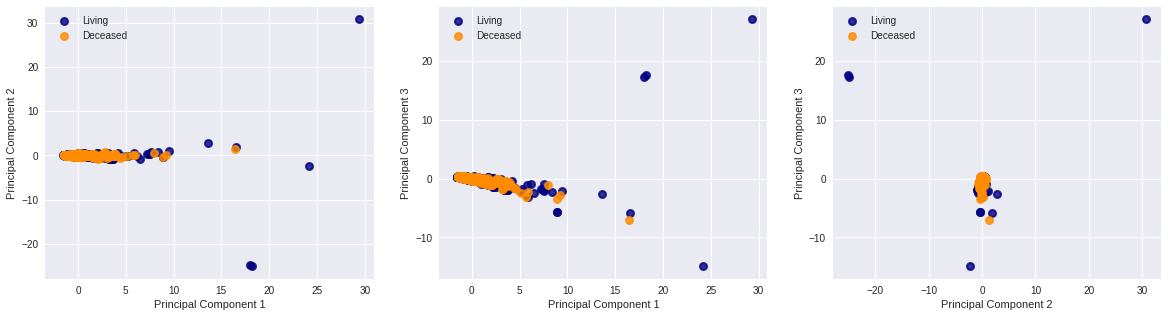

In [288]:
names = ['Living', 'Deceased']
plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

colors = ['navy', 'darkorange']
lw = 2

s1 = plt.subplot(131)
for color, i, name in zip(colors, [0, 1], names):
    s1.scatter(X_r[Y == i, 0], X_r[Y == i,1], color=color, alpha=.8, lw=lw,
                label=name)
s1.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s1.set_xlabel('Principal Component 1')
s1.set_ylabel('Principal Component 2')

s2 = plt.subplot(132)
for color, i, name in zip(colors, [0, 1], names):
    s2.scatter(X_r[Y == i, 0], X_r[Y == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s2.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s2.set_xlabel('Principal Component 1')
s2.set_ylabel('Principal Component 3')

s3 = plt.subplot(133)
for color, i, name in zip(colors, [0, 1], names):
    s3.scatter(X_r[Y == i, 1], X_r[Y == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s3.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s3.set_xlabel('Principal Component 2')
s3.set_ylabel('Principal Component 3')

plt.show()

ImportError: No module named plotly.plotly

In [252]:
lda = LDA(n_components=4)
X_r2 = lda.fit(mat, Y).transform(mat)

array([[ 4.54195],
       [-2.775  ],
       [-2.77517],
       ..., 
       [-2.72572],
       [ 4.50884],
       [ 4.56902]])

In [247]:
plt.figure()
for color, i, name in zip(colors, [0, 1], names):
    plt.scatter(X_r2[Y == i, 0], X_r2[Y == i, 1], alpha=.8, color=color,
                label=name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

IndexError: index 1 is out of bounds for axis 1 with size 1

In [191]:
target_names = iris.target_names

In [197]:
names = ['Living', 'Deceased']
names

['Living', 'Deceased']

explained variance ratio (first two components): [ 0.92461621  0.05301557]


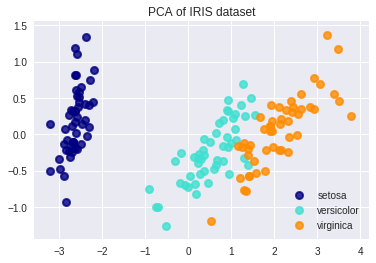

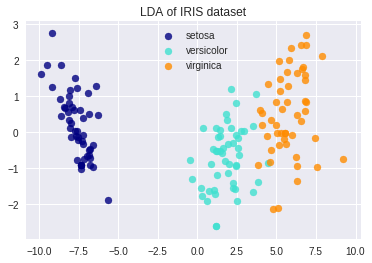

In [218]:
X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [243]:
#try clustering

from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
# generate the linkage matrix
Z = linkage(mat, 'ward')

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(mat))
c

0.69980866455260704

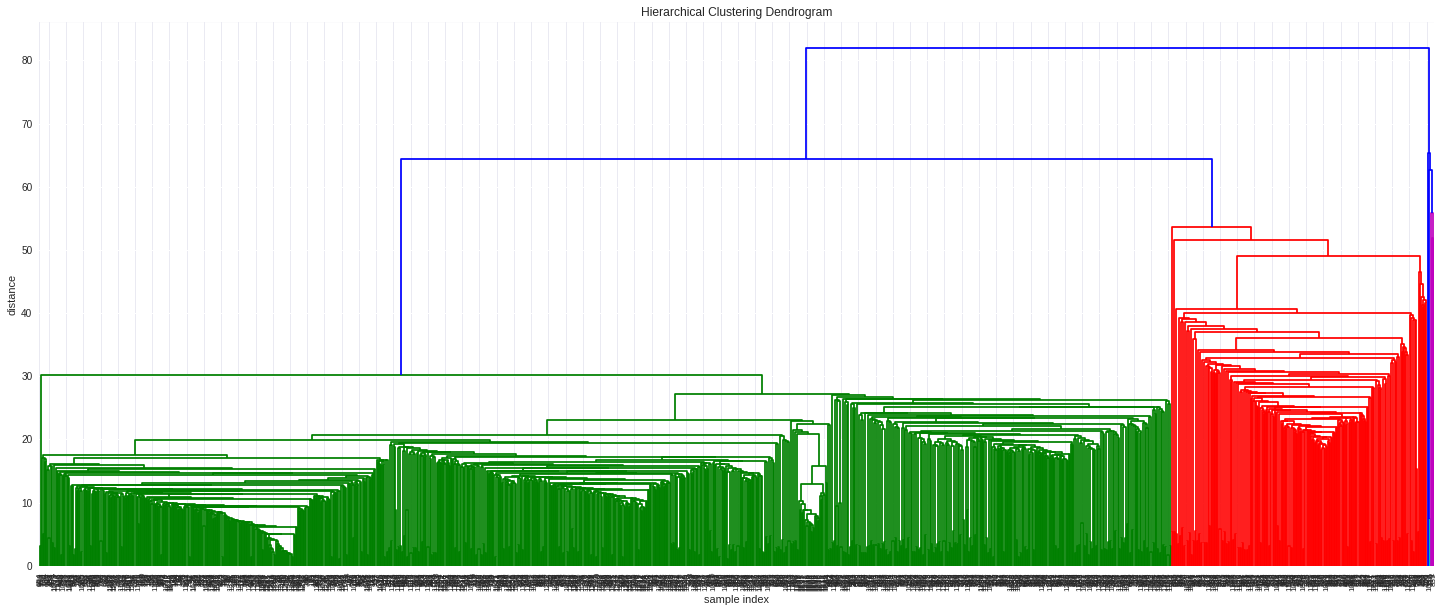

In [244]:
#plot it

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()



In [451]:
#let's look at the patient data

OSS_age_gender_DFS_combined_df

,GENDER,AGE,PATIENT_ID,DFS_STATUS,MUTATED_GENES,OS_STATUS,CANCER_TYPE_DETAILED
0,FEMALE,64,TCGA-C5-A1BE,RECURRED/PROGRESSED,"{u'SSX7': 1, u'CYFIP1': 1, u'USH2A': 1, u'INTS...",DECEASED,Cervical Squamous Cell Carcinoma
1,FEMALE,47,TCGA-FU-A3HY,DISEASEFREE,"{u'ABHD10': 1, u'STX1B': 1, u'RAPGEF2': 1, u'O...",LIVING,Cervical Squamous Cell Carcinoma
2,FEMALE,64,TCGA-FU-A3HZ,DISEASEFREE,"{u'UBE2Q1': 1, u'HSPA8': 1, u'TRAM1L1': 1, u'T...",LIVING,Cervical Squamous Cell Carcinoma
3,FEMALE,46,TCGA-C5-A1BF,RECURRED/PROGRESSED,"{u'TGM4': 1, u'STK11': 1, u'AC093157.1': 1, u'...",DECEASED,Cervical Squamous Cell Carcinoma
4,FEMALE,31,TCGA-C5-A1BI,DISEASEFREE,"{u'RECQL5': 1, u'USP8': 1, u'MAP4K3': 1, u'PIW...",LIVING,Cervical Squamous Cell Carcinoma
5,FEMALE,36,TCGA-C5-A1BK,DISEASEFREE,"{u'TRIM13': 1, u'DNAH17': 1, u'PKP3': 1, u'USP...",LIVING,Cervical Squamous Cell Carcinoma
6,FEMALE,34,TCGA-C5-A1BJ,DISEASEFREE,"{u'COL11A2': 1, u'REM1': 1, u'CYP2W1': 1, u'PK...",LIVING,Cervical Squamous Cell Carcinoma
7,FEMALE,78,TCGA-C5-A1BM,[NOT AVAILABLE],"{u'C5AR1': 1, u'TNRC6A': 1, u'ZNF791': 1, u'PP...",DECEASED,Cervical Squamous Cell Carcinoma
8,FEMALE,32,TCGA-C5-A1BL,DISEASEFREE,"{u'TM2D3': 1, u'WWP2': 1, u'CLMN': 1, u'UACA':...",LIVING,Cervical Squamous Cell Carcinoma
9,FEMALE,26,TCGA-C5-A1BN,[NOT AVAILABLE],"{u'LCMT1': 1, u'ACP5': 1, u'PTH1R': 1, u'LIPT2...",DECEASED,Cervical Squamous Cell Carcinoma


In [448]:
OSS_age_gender_DFS_combined_df['GENDER'] = map(lambda x: x.upper(), OSS_age_gender_DFS_combined_df['GENDER'])

In [450]:
OSS_age_gender_DFS_combined_df['DFS_STATUS'] = map(lambda x: x.upper(), OSS_age_gender_DFS_combined_df['DFS_STATUS'])

In [452]:
OSS_age_gender_DFS_combined_df1 = OSS_age_gender_DFS_combined_df

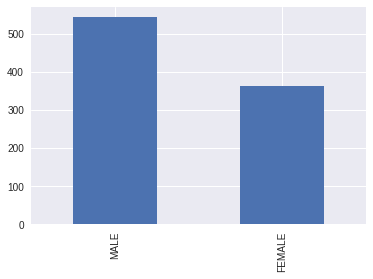

In [375]:
OSS_age_gender_DFS_combined_df1.GENDER.value_counts().plot(kind='bar')

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


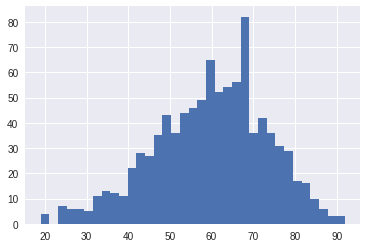

In [324]:
OSS_age_gender_DFS_combined_df1['AGE'] = map(lambda x: float(x), OSS_age_gender_DFS_combined_df1['AGE'])
OSS_age_gender_DFS_combined_df1.AGE.hist(bins=35)

In [319]:
OSS_age_gender_DFS_combined_df1 = OSS_age_gender_DFS_combined_df1[OSS_age_gender_DFS_combined_df1.AGE != '[Not Available]']

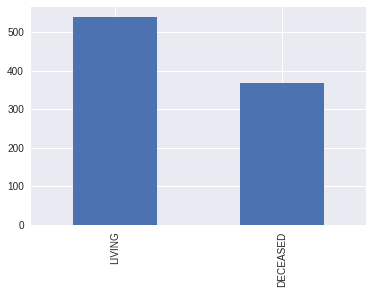

In [373]:
OSS_age_gender_DFS_combined_df1.OS_STATUS.value_counts().plot(kind='bar')

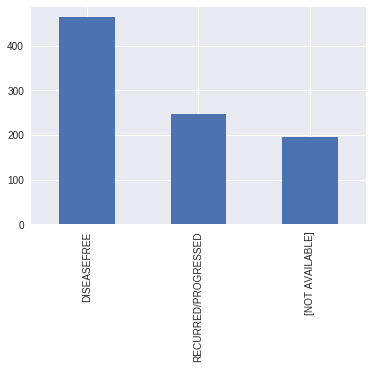

In [372]:
OSS_age_gender_DFS_combined_df1.DFS_STATUS.value_counts().plot(kind='bar')

In [368]:
OSS_age_gender_DFS_combined_df1.CANCER_TYPE_DETAILED.unique()

array(['Cervical Squamous Cell Carcinoma', 'Lung Squamous Cell Carcinoma',
       'Head & Neck Squamous Cell Carcinoma',
       'Cutaneous Squamous Cell Carcinoma'], dtype=object)

In [367]:
OSS_age_gender_DFS_combined_df1 =  OSS_age_gender_DFS_combined_df1[OSS_age_gender_DFS_combined_df1.CANCER_TYPE_DETAILED != 'Adenosquamous']
OSS_age_gender_DFS_combined_df1 =  OSS_age_gender_DFS_combined_df1[OSS_age_gender_DFS_combined_df1.CANCER_TYPE_DETAILED != 'Endocervical Type of Adenocarcinoma']
OSS_age_gender_DFS_combined_df1 =  OSS_age_gender_DFS_combined_df1[OSS_age_gender_DFS_combined_df1.CANCER_TYPE_DETAILED != 'Endocervical Adenocarcinoma of the Usual Type']
OSS_age_gender_DFS_combined_df1 =  OSS_age_gender_DFS_combined_df1[OSS_age_gender_DFS_combined_df1.CANCER_TYPE_DETAILED != 'Mucinous Adenocarcinoma of Endocervical Type']
#OSS_age_gender_DFS_combined_df1 =  OSS_age_gender_DFS_combined_df1[OSS_age_gender_DFS_combined_df1.CANCER_TYPE_DETAILED !='Endometrioid Adenocarcinoma of En
OSS_age_gender_DFS_combined_df1 = OSS_age_gender_DFS_combined_df1.replace(to_replace='Head and Neck Squamous Cell Carcinoma', value='Head & Neck Squamous Cell Carcinoma')
OSS_age_gender_DFS_combined_df1 = OSS_age_gender_DFS_combined_df1.replace(to_replace='Head & Neck Squamous Cell Carcinoma Basaloid Type', value='Head & Neck Squamous Cell Carcinoma')
OSS_age_gender_DFS_combined_df1 = OSS_age_gender_DFS_combined_df1.replace(to_replace='Head & Neck Squamous Cell Carcinoma, Spindle Cell Variant', value='Head & Neck Squamous Cell Carcinoma')

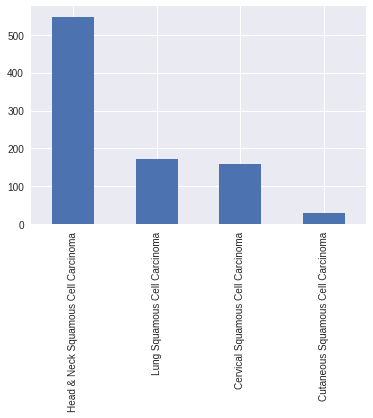

In [371]:
OSS_age_gender_DFS_combined_df1.CANCER_TYPE_DETAILED.value_counts().plot(kind='bar')

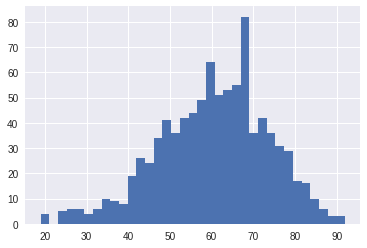

In [370]:
OSS_age_gender_DFS_combined_df1.AGE.hist(bins=35)

In [374]:
OSS_age_gender_DFS_combined_df1

,GENDER,AGE,DFS_STATUS,OS_STATUS,CANCER_TYPE_DETAILED
0,FEMALE,64.0,RECURRED/PROGRESSED,DECEASED,Cervical Squamous Cell Carcinoma
1,FEMALE,47.0,DISEASEFREE,LIVING,Cervical Squamous Cell Carcinoma
2,FEMALE,64.0,DISEASEFREE,LIVING,Cervical Squamous Cell Carcinoma
3,FEMALE,46.0,RECURRED/PROGRESSED,DECEASED,Cervical Squamous Cell Carcinoma
4,FEMALE,31.0,DISEASEFREE,LIVING,Cervical Squamous Cell Carcinoma
5,FEMALE,36.0,DISEASEFREE,LIVING,Cervical Squamous Cell Carcinoma
6,FEMALE,34.0,DISEASEFREE,LIVING,Cervical Squamous Cell Carcinoma
7,FEMALE,78.0,[NOT AVAILABLE],DECEASED,Cervical Squamous Cell Carcinoma
8,FEMALE,32.0,DISEASEFREE,LIVING,Cervical Squamous Cell Carcinoma
9,FEMALE,26.0,[NOT AVAILABLE],DECEASED,Cervical Squamous Cell Carcinoma


PCA indicated that the variance is spread out thinly amongst all the genes. The question now is "can we improve the performance of PCA by focusing on a subset of the genes that is most important for squamous cell carcinomas?" Repeat the analysis with only the set of 201 genes that is mutated in all 5 types of SCC (see Venn diagram in intro) and with the set of genes mutated in any 4 types of SCC (~3300 genes).

In [397]:
Overlapping4plus = pd.read_csv("../OverlappingGenes4plusSets_Routput.csv")
Overlap4_list = [Overlapping4plus['x'][i] for i in range(len(Overlapping4plus['x']))]
OverlappingAll = pd.read_csv("../CompletelyOverlappingGenes_Routput.csv")
OverlapAll_list = [OverlappingAll['x'][i] for i in range(len(OverlappingAll['x']))]

In [406]:
def PatientGenes_FilteredAll(genomic_df, pt):
    criterion = genomic_df['PATIENT_ID'].map(lambda x: x==pt)
    gList = []
    for it in genomic_df[criterion].Gene: 
        if it in OverlapAll_list:
            gList.append(it) 
    return gList

def MakeGeneDictDF_All(gen_df1, pt_list):
    genedict_list=[]
    for pt in pt_list:
        genedict_list.append((pt, GeneDictEncoder(PatientGenes_FilteredAll(gen_df1, pt))))
    return pd.DataFrame(genedict_list, columns=["PATIENT_ID","MUTATED_GENES"])

def PatientGenes_Filtered4genes(genomic_df, pt):
    criterion = genomic_df['PATIENT_ID'].map(lambda x: x==pt)
    gList = []
    for it in genomic_df[criterion].Gene:  
        if it in Overlap4_list:
            gList.append(it)
    return gList

def MakeGeneDictDF_4genes(gen_df1, pt_list):
    genedict_list=[]
    for pt in pt_list:
        genedict_list.append((pt, GeneDictEncoder(PatientGenes_Filtered4genes(gen_df1, pt))))
    return pd.DataFrame(genedict_list, columns=["PATIENT_ID","MUTATED_GENES"])


In [408]:
esoph2_genesAsDict_all_df = MakeGeneDictDF_All(esoph2_genomic_df, esoph2_patients)
esoph2_complete_all_df = pd.merge(esoph2_genesAsDict_all_df, esoph2_patient_df, on='PATIENT_ID')
esoph2_genesAsDict_4genes_df = MakeGeneDictDF_4genes(esoph2_genomic_df, esoph2_patients)
esoph2_complete_4genes_df = pd.merge(esoph2_genesAsDict_4genes_df, esoph2_patient_df, on='PATIENT_ID')
esoph2_complete_4genes_df

,PATIENT_ID,MUTATED_GENES,SAMPLE_ID,GENDER,AGE,OS_STATUS,OS_MONTHS,TUMOR_STAGE,TNM,SMOKER,CANCER_TYPE_DETAILED
0,ESCC-148T,"{u'ZCCHC13': 1, u'TMC4': 1, u'SLC6A7': 1, u'LR...",ESCC-148T,Female,68,DECEASED,4.83,IIIA,T3N1M0,No,Esophageal Squamous Cell Carcinoma
1,ESCC-116T,"{u'MDN1': 1, u'ZNFX1': 1, u'ZCCHC11': 1, u'TUB...",ESCC-116T,Male,72,DECEASED,28.42,IIB,T3N0M0,Yes,Esophageal Squamous Cell Carcinoma
2,ESCC-012T,"{u'KTN1': 1, u'ZNF318': 1, u'MLEC': 1, u'SDK2'...",ESCC-012T,Male,64,DECEASED,29.70,IIB,T2N1M0,Yes,Esophageal Squamous Cell Carcinoma
3,ESCC-123T,"{u'MMP14': 1, u'ZNF217': 1, u'FKBP15': 1, u'SA...",ESCC-123T,Male,56,LIVING,44.65,IIA,T3N0M0,Yes,Esophageal Squamous Cell Carcinoma
4,ESCC-164T,"{u'SPINK4': 1, u'HUWE1': 1, u'CASZ1': 1}",ESCC-164T,Male,41,DECEASED,14.82,IIIA,T3N1M0,Yes,Esophageal Squamous Cell Carcinoma
5,ESCC-057T,"{u'SBF2': 1, u'MAN2B2': 1, u'C2CD2L': 1, u'ZFH...",ESCC-057T,Female,60,DECEASED,22.77,IIIB,T3N2M0,Yes,Esophageal Squamous Cell Carcinoma
6,ESCC-059T,"{u'ENOX1': 1, u'MAP3K1': 1, u'LRIT3': 1, u'SNX...",ESCC-059T,Male,46,DECEASED,8.84,IIIC,T3N3M0,Yes,Esophageal Squamous Cell Carcinoma
7,ESCC-008T,"{u'RFWD2': 1, u'ANO5': 1, u'SF3B2': 1, u'RBMS1...",ESCC-008T,Female,64,LIVING,44.52,IIB,T2N1M0,No,Esophageal Squamous Cell Carcinoma
8,ESCC-229T,"{u'CHRDL1': 1, u'RANBP6': 1, u'TP53': 1, u'OR1...",ESCC-229T,Male,60,LIVING,35.09,IIB,T3N0M0,No,Esophageal Squamous Cell Carcinoma
9,ESCC-211T,"{u'GPR112': 1, u'MVP': 1, u'SRRM2': 1, u'SCNN1...",ESCC-211T,Female,60,DECEASED,22.70,IIB,T3N0M0,No,Esophageal Squamous Cell Carcinoma


In [411]:
cervical_genesAsDict_all_df = MakeGeneDictDF_All(cervical_genomic_df, cervical_patients)
cervical_complete_all_df = pd.merge(cervical_genesAsDict_all_df, cervical_patient_df, on='PATIENT_ID')
cervical_genesAsDict_4genes_df = MakeGeneDictDF_4genes(cervical_genomic_df, cervical_patients)
cervical_complete_4genes_df = pd.merge(cervical_genesAsDict_4genes_df, cervical_patient_df, on='PATIENT_ID')
cervical_complete_4genes_df

,PATIENT_ID,MUTATED_GENES,GENDER,TOBACCO_SMOKING_HISTORY_INDICATOR,SMOKING_YEAR_STARTED,SMOKING_YEAR_STOPPED,SMOKING_PACK_YEARS,AGE,HISTOLOGICAL_DIAGNOSIS,GRADE,INITIAL_PATHOLOGIC_DX_YEAR,AJCC_NODES_PATHOLOGIC_PN,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_METASTASIS_PATHOLOGIC_PM,CLINICAL_STAGE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-C5-A1BE,"{u'USH2A': 1, u'KIF16B': 1, u'FOXO4': 1, u'TSP...",FEMALE,3,[Not Available],[Not Available],[Not Available],64,Cervical Squamous Cell Carcinoma,G2,2000,N1,T1b,MX,Stage IB2,Cervical,DECEASED,68.79,Recurred/Progressed,54.99
1,TCGA-FU-A3HY,"{u'OR4K1': 1, u'DIP2B': 1, u'ERCC4': 1, u'GTF3...",FEMALE,2,16,[Not Available],5,47,Cervical Squamous Cell Carcinoma,G2,2011,N1,T1b2,MX,Stage IB2,Cervical,LIVING,31.34,DiseaseFree,31.34
2,TCGA-FU-A3HZ,"{u'UBE2Q1': 1, u'OR6C75': 1, u'ZDHHC17': 1, u'...",FEMALE,1,[Not Available],[Not Available],[Not Available],64,Cervical Squamous Cell Carcinoma,G3,2010,N0,T2a2,M0,Stage IIA2,Cervical,LIVING,36.24,DiseaseFree,36.24
3,TCGA-C5-A1BF,"{u'TNKS': 1, u'RANBP2': 1, u'HLA-A': 1, u'STK1...",FEMALE,2,[Not Available],[Not Available],30,46,Cervical Squamous Cell Carcinoma,G1,1997,N0,TX,MX,Stage IB,Cervical,DECEASED,18.73,Recurred/Progressed,3.06
4,TCGA-C5-A1BI,"{u'PI4KA': 1, u'SPTAN1': 1, u'NEB': 1, u'IGSF1...",FEMALE,2,16,[Not Available],15,31,Cervical Squamous Cell Carcinoma,G2,2001,[Not Available],[Not Available],[Not Available],Stage IIIB,Cervical,LIVING,36.53,DiseaseFree,36.53
5,TCGA-C5-A1BK,"{u'MYH10': 1, u'DNAH17': 1, u'EPHA4': 1, u'HEL...",FEMALE,1,[Not Available],[Not Available],[Not Available],36,Cervical Squamous Cell Carcinoma,G2,1994,N0,T1b,MX,Stage IB,Cervical,LIVING,176.91,DiseaseFree,176.91
6,TCGA-C5-A1BJ,"{u'PRPF40A': 1, u'HLA-B': 1, u'CYLC1': 1, u'ME...",FEMALE,4,24,1997,10,34,Cervical Squamous Cell Carcinoma,G2,1997,[Not Available],[Not Available],[Not Available],Stage IIB,Cervical,LIVING,144.05,DiseaseFree,144.05
7,TCGA-C5-A1BM,"{u'MYH11': 1, u'COL22A1': 1, u'EGFR': 1, u'SLC...",FEMALE,4,[Not Available],[Not Available],[Not Available],78,Cervical Squamous Cell Carcinoma,G2,1997,N1,T2,MX,Stage IB,Cervical,DECEASED,82.79,[Not Available],[Not Available]
8,TCGA-C5-A1BL,"{u'SLC4A10': 1, u'RYR2': 1, u'MYRIP': 1, u'TEX...",FEMALE,4,16,1988,12,32,Cervical Squamous Cell Carcinoma,G2,1994,[Not Available],[Not Available],[Not Available],Stage IB,Cervical,LIVING,173.16,DiseaseFree,173.16
9,TCGA-C5-A1BN,"{u'ZDBF2': 1, u'ATP2A1': 1, u'POLQ': 1, u'PDS5...",FEMALE,2,15,[Not Available],11,26,Cervical Squamous Cell Carcinoma,G3,2007,[Not Available],[Not Available],[Not Available],Stage IB2,Cervical,DECEASED,5.45,[Not Available],[Not Available]


In [412]:
hn3_genesAsDict_all_df = MakeGeneDictDF_All(hn3_genomic_df, hn3_patients)
hn3_complete_all_df = pd.merge(hn3_genesAsDict_all_df, hn3_patient_df, on='PATIENT_ID')
hn3_genesAsDict_4genes_df = MakeGeneDictDF_4genes(hn3_genomic_df, hn3_patients)
hn3_complete_4genes_df = pd.merge(hn3_genesAsDict_4genes_df, hn3_patient_df, on='PATIENT_ID')
hn3_complete_4genes_df

,PATIENT_ID,MUTATED_GENES,SEX,TUMOR_STAGE,AGE,NODAL_STAGE,NUMBER_OF_LYMPHNODES_POSITIVE,SMOKER,TOBACCO_SMOKING_HISTORY_INDICATOR,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS,CANCER_TYPE_DETAILED
0,OSCJM-PT27-562-T,"{u'AMOTL1': 1, u'SIN3A': 1, u'MTOR': 1, u'EVC2...",Female,T2,61,N2b,3,Yes,Yes,LIVING,17.3,Diseasefree,9.4,Head and Neck Squamous Cell Carcinoma
1,OSCJM-PT05-91-T,"{u'HLA-B': 1, u'SHROOM3': 1, u'PCDHGB1': 1, u'...",Male,T3,41,N1,1,Yes,Yes,LIVING,110.8,Diseasefree,1.4,Head and Neck Squamous Cell Carcinoma
2,OSCJM-PT04-447-T,"{u'TP53': 1, u'SGK2': 1, u'RFX4': 1, u'ASPM': ...",Male,T3,26,N1,1,No,No,LIVING,45.5,Diseasefree,43.2,Head and Neck Squamous Cell Carcinoma
3,OSCJM-PT45-364-T,"{u'SMARCC2': 1, u'CDH10': 1, u'SORCS2': 1, u'A...",Male,T4,74,N0,0,Yes,Yes,LIVING,49.5,Diseasefree,49.0,Head and Neck Squamous Cell Carcinoma
4,OSCJM-PTA-367-T,"{u'EPHA8': 1, u'SFMBT2': 1, u'CNTNAP4': 1, u'Z...",Male,T3,66,N2b,3,No,Yes,LIVING,47.0,Diseasefree,45.1,Head and Neck Squamous Cell Carcinoma
5,OSCJM-PT35-37-T,"{u'KIF16B': 1, u'SAMD9L': 1, u'AP3B2': 1, u'TP...",Male,T4,70,N2b,7,Yes,Yes,DECEASED,6.9,Recurred/Progressed,6.3,Head and Neck Squamous Cell Carcinoma
6,OSCJM-PT50-575-T,"{u'AOC1': 1, u'CYP2J2': 1, u'SMAD4': 1, u'BIRC...",Male,T4,66,N2c,5,Yes,Yes,DECEASED,28.3,Recurred/Progressed,26.4,Head and Neck Squamous Cell Carcinoma
7,OSCJM-PT25-327-T,"{u'ZBTB1': 1, u'ZBTB38': 1, u'KALRN': 1, u'MGA...",Male,T3,53,N1,1,Yes,Yes,LIVING,36.2,Diseasefree,34.3,Head and Neck Squamous Cell Carcinoma
8,OSCJM-PT15-391-T,"{u'DMXL2': 1, u'ENPEP': 1, u'INTS1': 1, u'MAML...",Male,T4,75,N2c,3,Yes,Yes,DECEASED,83.4,Recurred/Progressed,81.7,Head and Neck Squamous Cell Carcinoma
9,OSCJM-PT40-169-T,"{u'MDN1': 1, u'HIST1H4E': 1, u'GNPTAB': 1, u'C...",Female,T4,57,N2b,2,Yes,Yes,LIVING,143.1,Recurred/Progressed,140.9,Head and Neck Squamous Cell Carcinoma


In [413]:
hn4_genesAsDict_all_df = MakeGeneDictDF_All(hn4_genomic_df, hn4_patients)
hn4_complete_all_df = pd.merge(hn4_genesAsDict_all_df, hn4_patient_df, on='PATIENT_ID')
hn4_genesAsDict_4genes_df = MakeGeneDictDF_4genes(hn4_genomic_df, hn4_patients)
hn4_complete_4genes_df = pd.merge(hn4_genesAsDict_4genes_df, hn4_patient_df, on='PATIENT_ID')
hn4_complete_4genes_df

,PATIENT_ID,MUTATED_GENES,SAMPLE_ID,OS_STATUS,OS_MONTHS,CANCER_TYPE_DETAILED
0,TCGA-DQ-5625-01,"{u'IFIH1': 1, u'MYH13': 1, u'DMD': 1, u'ANO4':...",TCGA-DQ-5625-01,LIVING,34.76,Head and Neck Squamous Cell Carcinoma
1,TCGA-CN-4730-01,"{u'SLC4A10': 1, u'SORCS1': 1, u'SORCS3': 1, u'...",TCGA-CN-4730-01,LIVING,11.27,Head and Neck Squamous Cell Carcinoma
2,TCGA-BA-5149-01,"{u'ZNF337': 1, u'CDH15': 1, u'ZDBF2': 1, u'FAM...",TCGA-BA-5149-01,LIVING,8.15,Head and Neck Squamous Cell Carcinoma
3,TCGA-CV-5436-01,"{u'HHIPL2': 1, u'SALL3': 1, u'POLQ': 1, u'EPHA...",TCGA-CV-5436-01,DECEASED,19.19,Head and Neck Squamous Cell Carcinoma
4,TCGA-CV-5966-01,"{u'DNAH10': 1, u'TCERG1': 1, u'SHROOM3': 1, u'...",TCGA-CV-5966-01,DECEASED,17.91,Head and Neck Squamous Cell Carcinoma
5,TCGA-CR-6467-01,"{u'DNAH2': 1, u'WDTC1': 1, u'FSCB': 1, u'EIF2A...",TCGA-CR-6467-01,NaN,NaN,Head and Neck Squamous Cell Carcinoma
6,TCGA-CV-6436-01,"{u'GCM2': 1, u'EPHA7': 1, u'HRAS': 1, u'SLC5A4...",TCGA-CV-6436-01,LIVING,24.41,Head and Neck Squamous Cell Carcinoma
7,TCGA-CV-7418-01,"{u'CYP2J2': 1, u'MYH10': 1, u'HECTD1': 1, u'FI...",TCGA-CV-7418-01,NaN,NaN,Head and Neck Squamous Cell Carcinoma
8,TCGA-CN-6998-01,"{u'PDGFRB': 1, u'ZFHX4': 1, u'TCERG1': 1, u'PR...",TCGA-CN-6998-01,LIVING,1.51,Head and Neck Squamous Cell Carcinoma
9,TCGA-CV-7263-01,"{u'MYH10': 1, u'ZCCHC11': 1, u'ANO4': 1, u'MLE...",TCGA-CV-7263-01,NaN,NaN,Head and Neck Squamous Cell Carcinoma


In [414]:
hn5_genesAsDict_all_df = MakeGeneDictDF_All(hn5_genomic_df, hn5_patients)
hn5_complete_all_df = pd.merge(hn5_genesAsDict_all_df, hn5_patient_df, on='PATIENT_ID')
hn5_genesAsDict_4genes_df = MakeGeneDictDF_4genes(hn5_genomic_df, hn5_patients)
hn5_complete_4genes_df = pd.merge(hn5_genesAsDict_4genes_df, hn5_patient_df, on='PATIENT_ID')
hn5_complete_4genes_df

,PATIENT_ID,MUTATED_GENES,HISTOLOGICAL_DIAGNOSIS,GENDER,LYMPH_NODES_EXAMINED_HE_COUNT,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_PATHOLOGIC_TUMOR_STAGE,GRADE,...,AGE,CLIN_M_STAGE,CLIN_N_STAGE,CLIN_T_STAGE,CLINICAL_STAGE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-CQ-A4CG,"{u'DMD': 1, u'HRAS': 1, u'ESYT1': 1, u'JPH3': ...",Head & Neck Squamous Cell Carcinoma,FEMALE,0,T3,N0,M0,Stage III,G2,...,78,M0,N0,T2,Stage II,Head and Neck,DECEASED,14.13,Recurred/Progressed,11.50
1,TCGA-CV-7180,"{u'OBSCN': 1, u'LGR4': 1, u'DOCK9': 1, u'SGK22...",Head & Neck Squamous Cell Carcinoma,MALE,0,T2,NX,[Not Available],Stage II,G2,...,34,M0,N0,T2,Stage II,Head and Neck,DECEASED,10.74,[Not Available],[Not Available]
2,TCGA-CQ-A4CE,"{u'PCSK2': 1, u'SORCS3': 1, u'SRGAP3': 1, u'CN...",Head & Neck Squamous Cell Carcinoma,FEMALE,0,T2,N0,M0,Stage II,G2,...,76,M0,N0,T2,Stage II,Head and Neck,LIVING,29.47,DiseaseFree,29.47
3,TCGA-CQ-A4CD,"{u'FARS2': 1, u'OLFM3': 1, u'SRRM2': 1, u'CDH1...",Head & Neck Squamous Cell Carcinoma,MALE,0,T4a,N0,M0,Stage IVA,G3,...,69,M0,N0,T4b,Stage IVB,Head and Neck,LIVING,33.57,DiseaseFree,33.57
4,TCGA-CQ-A4CB,"{u'CRLF3': 1, u'USH2A': 1, u'KALRN': 1, u'HUWE...",Head & Neck Squamous Cell Carcinoma,MALE,1,T1,N1,M0,Stage III,G2,...,59,M0,N0,T2,Stage II,Head and Neck,LIVING,29.34,DiseaseFree,29.34
5,TCGA-CQ-A4CA,"{u'SYNM': 1, u'PPFIA2': 1, u'FUS': 1, u'IMPG1'...",Head & Neck Squamous Cell Carcinoma,MALE,0,T2,N0,M0,Stage II,G2,...,[Not Available],M0,N0,T2,Stage II,Head and Neck,LIVING,[Not Available],DiseaseFree,[Not Available]
6,TCGA-BA-5151,"{u'NLRP12': 1, u'SSFA2': 1, u'PCDHGB2': 1, u'R...",Head & Neck Squamous Cell Carcinoma,MALE,0,T4a,N0,[Not Available],Stage IVA,G1,...,72,M0,N0,T4a,Stage IVA,Head and Neck,LIVING,23.72,Recurred/Progressed,16.98
7,TCGA-BA-5153,"{u'MYH9': 1, u'HAL': 1, u'ERBB2IP': 1, u'KRT2'...",Head & Neck Squamous Cell Carcinoma,MALE,[Not Available],T2,NX,[Not Available],[Not Available],G2,...,51,M0,N1,T2,Stage III,Head and Neck,DECEASED,57.88,Recurred/Progressed,53.09
8,TCGA-BA-5152,"{u'FKBP15': 1, u'DNAH11': 1, u'C17orf75': 1, u...",Head & Neck Squamous Cell Carcinoma,MALE,0,T4a,N0,M0,Stage IVA,G2,...,56,M0,N0,T4a,Stage IVA,Head and Neck,LIVING,42.31,DiseaseFree,42.31
9,TCGA-BB-A6UO,"{u'MORC1': 1, u'KIAA1549': 1, u'SMAD4': 1, u'H...",Head & Neck Squamous Cell Carcinoma,FEMALE,[Not Available],T4a,N2b,MX,Stage IVA,G2,...,61,MX,N2,T3,Stage IVA,Head and Neck,DECEASED,8.80,Recurred/Progressed,6.96


In [415]:
lung2_genesAsDict_all_df = MakeGeneDictDF_All(lung2_genomic_df, lung2_patients)
lung2_complete_all_df = pd.merge(lung2_genesAsDict_all_df, lung2_patient_df, on='PATIENT_ID')
lung2_genesAsDict_4genes_df = MakeGeneDictDF_4genes(lung2_genomic_df, lung2_patients)
lung2_complete_4genes_df = pd.merge(lung2_genesAsDict_4genes_df, lung2_patient_df, on='PATIENT_ID')
lung2_complete_4genes_df

,PATIENT_ID,MUTATED_GENES,HISTOLOGICAL_DIAGNOSIS,GENDER,INITIAL_PATHOLOGIC_DX_YEAR,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_PATHOLOGIC_TUMOR_STAGE,TOBACCO_SMOKING_HISTORY_INDICATOR,SMOKING_YEAR_STARTED,SMOKING_YEAR_STOPPED,SMOKING_PACK_YEARS,AGE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-22-4607,"{u'ZNF337': 1, u'OR4K1': 1, u'DIEXF': 1, u'TME...",Lung Squamous Cell Carcinoma,MALE,2003,T2a,N0,M0,Stage IB,3,1948,1968,20,75,Lung,DECEASED,19.28,[Not Available],[Not Available]
1,TCGA-22-4604,"{u'UNC13A': 1, u'INSRR': 1, u'TARSL2': 1, u'CA...",Lung Squamous Cell Carcinoma,MALE,2003,T2a,N1,M0,Stage IIA,2,[Not Available],[Not Available],50,73,Lung,DECEASED,13.11,Recurred/Progressed,10.05
2,TCGA-22-4601,"{u'RFWD2': 1, u'GPATCH8': 1, u'KCNJ12': 1, u'S...",Lung Squamous Cell Carcinoma,FEMALE,2003,T4,N0,M0,Stage IIIA,2,[Not Available],[Not Available],60,73,Lung,DECEASED,34.72,Recurred/Progressed,17.25
3,TCGA-85-6175,"{u'F8': 1, u'ZBTB11': 1, u'NCOA1': 1, u'MYH7':...",Lung Squamous Cell Carcinoma,FEMALE,2010,T3,N0,M0,Stage IIB,1,[Not Available],[Not Available],[Not Available],63,Lung,DECEASED,9.66,[Not Available],[Not Available]
4,TCGA-60-2715,"{u'SRCAP': 1, u'MKI67': 1, u'CACNA1C': 1, u'DA...",Lung Squamous Cell Carcinoma,MALE,2008,T1,N0,M0,Stage IA,4,1983,2006,25,51,Lung,DECEASED,35.32,[Not Available],[Not Available]
5,TCGA-66-2734,"{u'HECTD1': 1, u'USP29': 1, u'OR8B8': 1, u'NAL...",Lung Squamous Cell Carcinoma,FEMALE,2005,T2,N0,M0,Stage IB,4,1965,2005,40,62,Lung,LIVING,43.07,DiseaseFree,43.07
6,TCGA-43-6143,"{u'PCSK2': 1, u'CTTNBP2': 1, u'HUWE1': 1, u'US...",Lung Squamous Cell Carcinoma,MALE,2010,T2,N0,M0,Stage IB,4,1953,2010,114,70,Lung,LIVING,22.96,DiseaseFree,22.96
7,TCGA-66-2756,"{u'DNAH17': 1, u'COL11A1': 1, u'USH2A': 1, u'T...",Lung Squamous Cell Carcinoma,MALE,2007,T4,N0,M0,Stage IIIB,4,1962,2002,[Not Available],68,Lung,LIVING,0.99,DiseaseFree,0.99
8,TCGA-66-2758,"{u'USH2A': 1, u'CCDC147': 1, u'C5AR1': 1, u'AN...",Lung Squamous Cell Carcinoma,MALE,2007,T2,N0,M0,Stage IB,4,1951,2007,56,71,Lung,LIVING,20.99,DiseaseFree,20.99
9,TCGA-33-4566,"{u'ZCCHC11': 1, u'TMCO4': 1, u'CCDC147': 1, u'...",Lung Squamous Cell Carcinoma,MALE,1996,T2,N0,M0,Stage IB,2,[Not Available],[Not Available],20,40,Lung,DECEASED,173.69,[Not Available],[Not Available]


In [417]:
def PatientGenesAdj_All(genomic_df, pt):
    criterion = genomic_df['SampleBC'].map(lambda x: x==pt)
    gList = []
    for it in genomic_df[criterion].Gene: 
        if it in OverlapAll_list:
            gList.append(it) 
    return gList

def MakeGeneDictDFAdj_All(gen_df1, pt_list):
    genedict_list=[]
    for pt in pt_list:
        genedict_list.append((pt, GeneDictEncoder(PatientGenesAdj_All(gen_df1, pt))))
    return pd.DataFrame(genedict_list, columns=["SampleBC","MUTATED_GENES"])

skin_genesAsDict_all_df = MakeGeneDictDFAdj_All(skin_genomic_df, skin_patients)
skin_complete_all_df = pd.merge(skin_genesAsDict_all_df, skin_patient_df, left_on='SampleBC', right_on='SAMPLE_ID')
skin_complete_all_df

,SampleBC,MUTATED_GENES,SAMPLE_ID,PATIENT_ID,AGE,GENDER,SMOKER,DFS_STATUS,OS_STATUS,CANCER_TYPE_DETAILED
0,S09-2518-TP-S12-11594-NT,"{u'KIAA1549': 1, u'EPHA7': 1, u'PRKDC': 1, u'T...",S09-2518-TP-S12-11594-NT,S09-2518,76,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
1,S10-24679-TP-NT,"{u'ATM': 1, u'EGFR': 1, u'CHEK1': 1, u'PRKDC':...",S10-24679-TP-NT,S10-24679,70,Male,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
2,S06-19548-TP-NT,"{u'LPHN3': 1, u'LRP2': 1, u'BRCA2': 1, u'TP53'...",S06-19548-TP-NT,S06-19548,67,Male,Yes,Recurred/Progressed,DECEASED,Cutaneous Squamous Cell Carcinoma
3,S05-31806-TP-NT,"{u'MYH2': 1, u'CDKN2A': 1, u'TP53': 1, u'MUC2'...",S05-31806-TP-NT,S05-31806,84,Female,Yes,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
4,S12-23181-TP-NT,"{u'SPTAN1': 1, u'EPHA5': 1, u'PRKDC': 1, u'SLC...",S12-23181-TP-NT,S12-23181,64,Male,Yes,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
5,S05-46290-TP-NT,"{u'LRP2': 1, u'WT1': 1, u'MYH13': 1, u'TP53': ...",S05-46290-TP-NT,S05-46290,77,Male,Yes,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
6,S09-31237-TP-NT,"{u'CIC': 1, u'MYH11': 1, u'EPHA7': 1, u'FUBP1'...",S09-31237-TP-NT,S09-31237,72,Female,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
7,S12-17796-TP-NT,"{u'BRCA2': 1, u'MAP3K9': 1, u'TP53': 1, u'CUBN...",S12-17796-TP-NT,S12-17796,77,Male,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
8,S08-7608-TP-NT,"{u'PPP2R1A': 1, u'SPTAN1': 1, u'ATM': 1, u'MSH...",S08-7608-TP-NT,S08-7608,72,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
9,S00-28455-TP-NT,"{u'LPHN2': 1, u'PREX2': 1, u'TP53': 1, u'ERBB4...",S00-28455-TP-NT,S00-28455,73,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma


In [419]:
def PatientGenesAdj_4genes(genomic_df, pt):
    criterion = genomic_df['SampleBC'].map(lambda x: x==pt)
    gList = []
    for it in genomic_df[criterion].Gene: 
        if it in Overlap4_list:
            gList.append(it) 
    return gList

def MakeGeneDictDFAdj_4genes(gen_df1, pt_list):
    genedict_list=[]
    for pt in pt_list:
        genedict_list.append((pt, GeneDictEncoder(PatientGenesAdj_4genes(gen_df1, pt))))
    return pd.DataFrame(genedict_list, columns=["SampleBC","MUTATED_GENES"])

skin_genesAsDict_4genes_df = MakeGeneDictDFAdj_4genes(skin_genomic_df, skin_patients)
skin_complete_4genes_df = pd.merge(skin_genesAsDict_4genes_df, skin_patient_df, left_on='SampleBC', right_on='SAMPLE_ID')
skin_complete_4genes_df

,SampleBC,MUTATED_GENES,SAMPLE_ID,PATIENT_ID,AGE,GENDER,SMOKER,DFS_STATUS,OS_STATUS,CANCER_TYPE_DETAILED
0,S09-2518-TP-S12-11594-NT,"{u'KIAA1549': 1, u'TCF4': 1, u'EPHA7': 1, u'HL...",S09-2518-TP-S12-11594-NT,S09-2518,76,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
1,S10-24679-TP-NT,"{u'ATM': 1, u'EGFR': 1, u'CHEK1': 1, u'PRKDC':...",S10-24679-TP-NT,S10-24679,70,Male,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
2,S06-19548-TP-NT,"{u'KIAA1549': 1, u'TBX22': 1, u'RET': 1, u'EPH...",S06-19548-TP-NT,S06-19548,67,Male,Yes,Recurred/Progressed,DECEASED,Cutaneous Squamous Cell Carcinoma
3,S05-31806-TP-NT,"{u'MYH2': 1, u'CDKN2A': 1, u'TP53': 1, u'NOTCH...",S05-31806-TP-NT,S05-31806,84,Female,Yes,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
4,S12-23181-TP-NT,"{u'ERBB2IP': 1, u'SPTAN1': 1, u'EPHA5': 1, u'K...",S12-23181-TP-NT,S12-23181,64,Male,Yes,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
5,S05-46290-TP-NT,"{u'MYH13': 1, u'PRKDC': 1, u'SMARCA2': 1, u'MA...",S05-46290-TP-NT,S05-46290,77,Male,Yes,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
6,S09-31237-TP-NT,"{u'CIC': 1, u'KMT2C': 1, u'MYH11': 1, u'EPHA7'...",S09-31237-TP-NT,S09-31237,72,Female,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
7,S12-17796-TP-NT,"{u'MAP3K9': 1, u'CDKN2A': 1, u'TP53': 1, u'LAM...",S12-17796-TP-NT,S12-17796,77,Male,No,DiseaseFree,LIVING,Cutaneous Squamous Cell Carcinoma
8,S08-7608-TP-NT,"{u'PDGFRB': 1, u'PPP2R1A': 1, u'SPTAN1': 1, u'...",S08-7608-TP-NT,S08-7608,72,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma
9,S00-28455-TP-NT,"{u'BRCA1': 1, u'LPHN2': 1, u'PDGFRA': 1, u'PRE...",S00-28455-TP-NT,S00-28455,73,Female,No,Recurred/Progressed,LIVING,Cutaneous Squamous Cell Carcinoma


In [420]:
#rename relevant columns so that they are consistent across dataframes
hn3_complete_all_df = hn3_complete_all_df.rename(columns={'SEX': 'GENDER'})
hn5_complete_all_df = hn5_complete_all_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})
lung2_complete_all_df = lung2_complete_all_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})
cervical_complete_all_df = cervical_complete_all_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})

In [421]:
hn3_complete_4genes_df = hn3_complete_4genes_df.rename(columns={'SEX': 'GENDER'})
hn5_complete_4genes_df = hn5_complete_4genes_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})
lung2_complete_4genes_df = lung2_complete_4genes_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})
cervical_complete_4genes_df = cervical_complete_4genes_df.rename(columns={'HISTOLOGICAL_DIAGNOSIS': 'CANCER_TYPE_DETAILED'})

In [422]:
#combine all dataframes >> OSS dataframe
frames = ([cervical_complete_all_df, lung2_complete_all_df, hn3_complete_all_df, hn4_complete_all_df, hn5_complete_all_df, skin_complete_all_df, 
          esoph2_complete_all_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_combined_all_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [424]:
frames = ([cervical_complete_4genes_df, lung2_complete_4genes_df, hn3_complete_4genes_df, hn4_complete_4genes_df, hn5_complete_4genes_df, skin_complete_4genes_df, 
          esoph2_complete_4genes_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_combined_4genes_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [425]:
#combine dataframes >> OSS dataframe, age, gender
frames = ([cervical_complete_all_df, lung2_complete_all_df, hn3_complete_all_df, hn5_complete_all_df, skin_complete_all_df, 
          esoph2_complete_all_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_age_gender_combined_all_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [426]:
frames = ([cervical_complete_4genes_df, lung2_complete_4genes_df, hn3_complete_4genes_df, hn5_complete_4genes_df, skin_complete_4genes_df, 
          esoph2_complete_4genes_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_age_gender_combined_4genes_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [427]:
#combine dataframes >> OSS dataframe, age, gender, dfs
frames = ([cervical_complete_all_df, lung2_complete_all_df, hn3_complete_all_df, hn5_complete_all_df, skin_complete_all_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_age_gender_DFS_combined_all_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [428]:
frames = ([cervical_complete_4genes_df, lung2_complete_4genes_df, hn3_complete_4genes_df, hn5_complete_4genes_df, skin_complete_4genes_df])
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
OSS_age_gender_DFS_combined_4genes_df = pd.concat([df[common_cols] for df in frames], ignore_index=True)

In [429]:
mutated_gene_matrix_all = fe.DictVectorizer([item for item in OSS_combined_all_df.MUTATED_GENES])

In [431]:
vec_all = fe.DictVectorizer()
mat_all = vec_all.fit_transform([item for item in OSS_combined_all_df.MUTATED_GENES]).toarray()

In [432]:
mat_all

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [433]:
pca_all = PCA(n_components = 4)
Y_all = np.asarray([(1 if OSS_combined_all_df.OS_STATUS[i]=='DECEASED' else 0) for i in range(len(OSS_combined_all_df.OS_STATUS))])

In [436]:
X_r_all = pca_all.fit(mat_all).transform(mat_all)
print('explained variance ratio (first two components): %s'
      % str(pca_all.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.06688  0.04183  0.02628  0.02363]


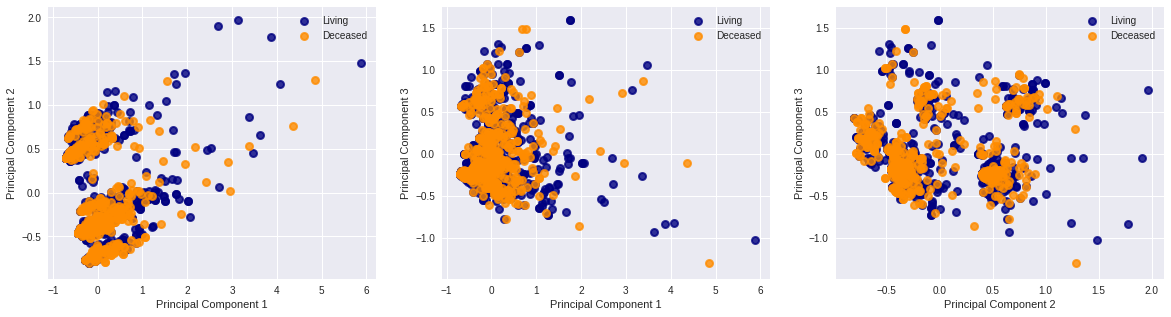

In [437]:
names = ['Living', 'Deceased']
plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

colors = ['navy', 'darkorange']
lw = 2

s1 = plt.subplot(131)
for color, i, name in zip(colors, [0, 1], names):
    s1.scatter(X_r_all[Y == i, 0], X_r_all[Y == i,1], color=color, alpha=.8, lw=lw,
                label=name)
s1.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s1.set_xlabel('Principal Component 1')
s1.set_ylabel('Principal Component 2')

s2 = plt.subplot(132)
for color, i, name in zip(colors, [0, 1], names):
    s2.scatter(X_r_all[Y == i, 0], X_r_all[Y == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s2.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s2.set_xlabel('Principal Component 1')
s2.set_ylabel('Principal Component 3')

s3 = plt.subplot(133)
for color, i, name in zip(colors, [0, 1], names):
    s3.scatter(X_r_all[Y == i, 1], X_r_all[Y == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s3.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s3.set_xlabel('Principal Component 2')
s3.set_ylabel('Principal Component 3')

plt.show()

In [438]:
vec_4g = fe.DictVectorizer()
mat_4g = vec_4g.fit_transform([item for item in OSS_combined_4genes_df.MUTATED_GENES]).toarray()
pca_4g = PCA(n_components = 4)
Y_4g = np.asarray([(1 if OSS_combined_4genes_df.OS_STATUS[i]=='DECEASED' else 0) for i in range(len(OSS_combined_4genes_df.OS_STATUS))])
X_r_4g = pca_4g.fit(mat_4g).transform(mat_4g)
print('explained variance ratio (first two components): %s'
      % str(pca_4g.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.04047  0.00984  0.0097   0.00758]


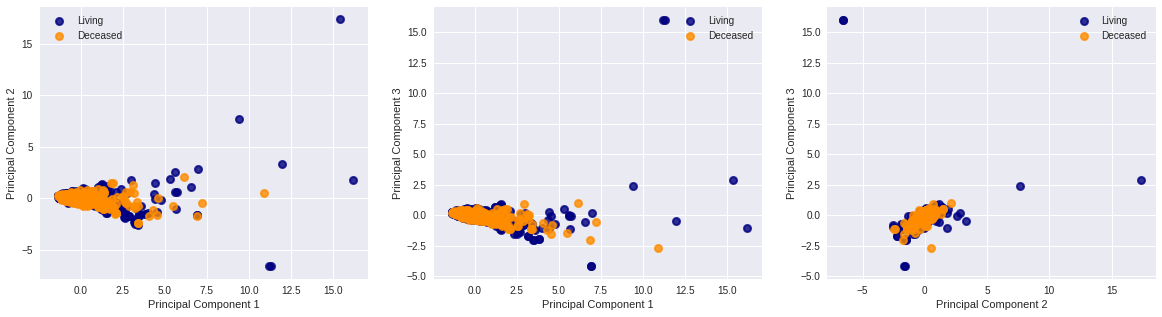

In [439]:
names = ['Living', 'Deceased']
plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

colors = ['navy', 'darkorange']
lw = 2

s1 = plt.subplot(131)
for color, i, name in zip(colors, [0, 1], names):
    s1.scatter(X_r_4g[Y == i, 0], X_r_4g[Y == i,1], color=color, alpha=.8, lw=lw,
                label=name)
s1.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s1.set_xlabel('Principal Component 1')
s1.set_ylabel('Principal Component 2')

s2 = plt.subplot(132)
for color, i, name in zip(colors, [0, 1], names):
    s2.scatter(X_r_4g[Y == i, 0], X_r_4g[Y == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s2.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s2.set_xlabel('Principal Component 1')
s2.set_ylabel('Principal Component 3')

s3 = plt.subplot(133)
for color, i, name in zip(colors, [0, 1], names):
    s3.scatter(X_r_4g[Y == i, 1], X_r_4g[Y == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s3.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s3.set_xlabel('Principal Component 2')
s3.set_ylabel('Principal Component 3')

plt.show()

In [453]:
OSS_age_gender_DFS_combined_df

,GENDER,AGE,PATIENT_ID,DFS_STATUS,MUTATED_GENES,OS_STATUS,CANCER_TYPE_DETAILED
0,FEMALE,64,TCGA-C5-A1BE,RECURRED/PROGRESSED,"{u'SSX7': 1, u'CYFIP1': 1, u'USH2A': 1, u'INTS...",DECEASED,Cervical Squamous Cell Carcinoma
1,FEMALE,47,TCGA-FU-A3HY,DISEASEFREE,"{u'ABHD10': 1, u'STX1B': 1, u'RAPGEF2': 1, u'O...",LIVING,Cervical Squamous Cell Carcinoma
2,FEMALE,64,TCGA-FU-A3HZ,DISEASEFREE,"{u'UBE2Q1': 1, u'HSPA8': 1, u'TRAM1L1': 1, u'T...",LIVING,Cervical Squamous Cell Carcinoma
3,FEMALE,46,TCGA-C5-A1BF,RECURRED/PROGRESSED,"{u'TGM4': 1, u'STK11': 1, u'AC093157.1': 1, u'...",DECEASED,Cervical Squamous Cell Carcinoma
4,FEMALE,31,TCGA-C5-A1BI,DISEASEFREE,"{u'RECQL5': 1, u'USP8': 1, u'MAP4K3': 1, u'PIW...",LIVING,Cervical Squamous Cell Carcinoma
5,FEMALE,36,TCGA-C5-A1BK,DISEASEFREE,"{u'TRIM13': 1, u'DNAH17': 1, u'PKP3': 1, u'USP...",LIVING,Cervical Squamous Cell Carcinoma
6,FEMALE,34,TCGA-C5-A1BJ,DISEASEFREE,"{u'COL11A2': 1, u'REM1': 1, u'CYP2W1': 1, u'PK...",LIVING,Cervical Squamous Cell Carcinoma
7,FEMALE,78,TCGA-C5-A1BM,[NOT AVAILABLE],"{u'C5AR1': 1, u'TNRC6A': 1, u'ZNF791': 1, u'PP...",DECEASED,Cervical Squamous Cell Carcinoma
8,FEMALE,32,TCGA-C5-A1BL,DISEASEFREE,"{u'TM2D3': 1, u'WWP2': 1, u'CLMN': 1, u'UACA':...",LIVING,Cervical Squamous Cell Carcinoma
9,FEMALE,26,TCGA-C5-A1BN,[NOT AVAILABLE],"{u'LCMT1': 1, u'ACP5': 1, u'PTH1R': 1, u'LIPT2...",DECEASED,Cervical Squamous Cell Carcinoma


In [460]:
vec_dfs = fe.DictVectorizer()
mat_dfs = vec_dfs.fit_transform([item for item in OSS_age_gender_DFS_combined_df.MUTATED_GENES]).toarray()
pca_dfs = PCA(n_components = 4)
Y_dfs = np.asarray([(1 if OSS_age_gender_DFS_combined_df.DFS_STATUS[i]=='RECURRED/PROGRESSED' else 0) for i in range(len(OSS_age_gender_DFS_combined_df.DFS_STATUS))])
X_r_dfs = pca_dfs.fit(mat_dfs).transform(mat_dfs)
print('explained variance ratio (first two components): %s'
      % str(pca_dfs.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.03232  0.01406  0.01054  0.00953]


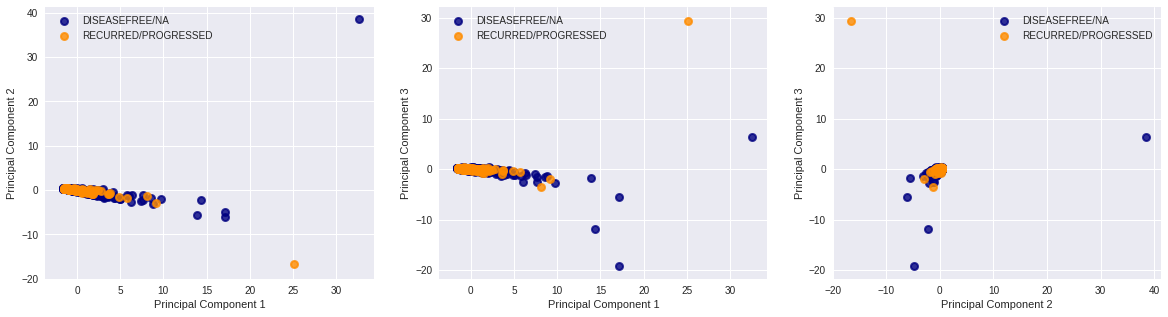

In [461]:
names = ['DISEASEFREE/NA', 'RECURRED/PROGRESSED']
plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

colors = ['navy', 'darkorange']
lw = 2

s1 = plt.subplot(131)
for color, i, name in zip(colors, [0, 1], names):
    s1.scatter(X_r_dfs[Y_dfs == i, 0], X_r_dfs[Y_dfs == i,1], color=color, alpha=.8, lw=lw,
                label=name)
s1.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s1.set_xlabel('Principal Component 1')
s1.set_ylabel('Principal Component 2')

s2 = plt.subplot(132)
for color, i, name in zip(colors, [0, 1], names):
    s2.scatter(X_r_dfs[Y_dfs == i, 0], X_r_dfs[Y_dfs == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s2.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s2.set_xlabel('Principal Component 1')
s2.set_ylabel('Principal Component 3')

s3 = plt.subplot(133)
for color, i, name in zip(colors, [0, 1], names):
    s3.scatter(X_r_dfs[Y_dfs == i, 1], X_r_dfs[Y_dfs == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s3.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s3.set_xlabel('Principal Component 2')
s3.set_ylabel('Principal Component 3')

plt.show()

In [462]:
OSS_age_gender_DFS_combined_4genes_df['GENDER'] = map(lambda x: x.upper(), OSS_age_gender_DFS_combined_4genes_df['GENDER'])
OSS_age_gender_DFS_combined_4genes_df['DFS_STATUS'] = map(lambda x: x.upper(), OSS_age_gender_DFS_combined_4genes_df['DFS_STATUS'])

In [463]:
OSS_age_gender_combined_4genes_df

,GENDER,AGE,PATIENT_ID,MUTATED_GENES,OS_STATUS,CANCER_TYPE_DETAILED
0,FEMALE,64,TCGA-C5-A1BE,"{u'USH2A': 1, u'KIF16B': 1, u'FOXO4': 1, u'TSP...",DECEASED,Cervical Squamous Cell Carcinoma
1,FEMALE,47,TCGA-FU-A3HY,"{u'OR4K1': 1, u'DIP2B': 1, u'ERCC4': 1, u'GTF3...",LIVING,Cervical Squamous Cell Carcinoma
2,FEMALE,64,TCGA-FU-A3HZ,"{u'UBE2Q1': 1, u'OR6C75': 1, u'ZDHHC17': 1, u'...",LIVING,Cervical Squamous Cell Carcinoma
3,FEMALE,46,TCGA-C5-A1BF,"{u'TNKS': 1, u'RANBP2': 1, u'HLA-A': 1, u'STK1...",DECEASED,Cervical Squamous Cell Carcinoma
4,FEMALE,31,TCGA-C5-A1BI,"{u'PI4KA': 1, u'SPTAN1': 1, u'NEB': 1, u'IGSF1...",LIVING,Cervical Squamous Cell Carcinoma
5,FEMALE,36,TCGA-C5-A1BK,"{u'MYH10': 1, u'DNAH17': 1, u'EPHA4': 1, u'HEL...",LIVING,Cervical Squamous Cell Carcinoma
6,FEMALE,34,TCGA-C5-A1BJ,"{u'PRPF40A': 1, u'HLA-B': 1, u'CYLC1': 1, u'ME...",LIVING,Cervical Squamous Cell Carcinoma
7,FEMALE,78,TCGA-C5-A1BM,"{u'MYH11': 1, u'COL22A1': 1, u'EGFR': 1, u'SLC...",DECEASED,Cervical Squamous Cell Carcinoma
8,FEMALE,32,TCGA-C5-A1BL,"{u'SLC4A10': 1, u'RYR2': 1, u'MYRIP': 1, u'TEX...",LIVING,Cervical Squamous Cell Carcinoma
9,FEMALE,26,TCGA-C5-A1BN,"{u'ZDBF2': 1, u'ATP2A1': 1, u'POLQ': 1, u'PDS5...",DECEASED,Cervical Squamous Cell Carcinoma


In [464]:
vec_dfs_4g = fe.DictVectorizer()
mat_dfs_4g = vec_dfs_4g.fit_transform([item for item in OSS_age_gender_DFS_combined_4genes_df.MUTATED_GENES]).toarray()
pca_dfs_4g = PCA(n_components = 4)
Y_dfs_4g = np.asarray([(1 if OSS_age_gender_DFS_combined_4genes_df.DFS_STATUS[i]=='RECURRED/PROGRESSED' else 0) for i in range(len(OSS_age_gender_DFS_combined_4genes_df.DFS_STATUS))])
X_r_dfs_4g = pca_dfs_4g.fit(mat_dfs_4g).transform(mat_dfs_4g)
print('explained variance ratio (first two components): %s'
      % str(pca_dfs_4g.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.0444   0.01155  0.0092   0.00896]


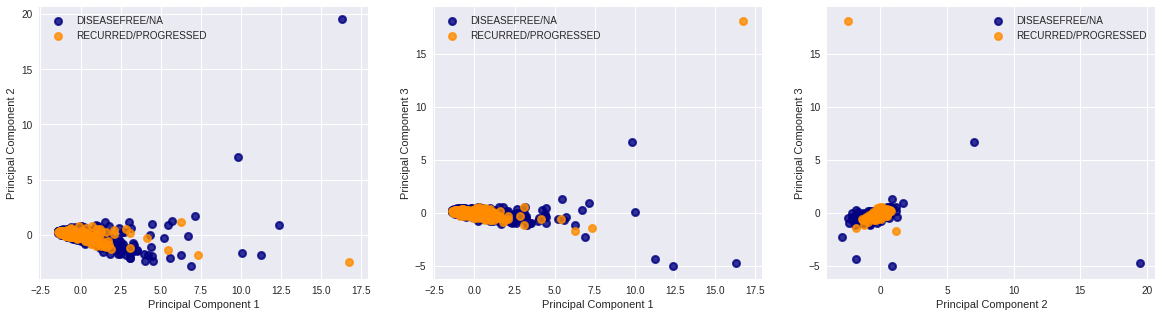

In [465]:
names = ['DISEASEFREE/NA', 'RECURRED/PROGRESSED']
plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

colors = ['navy', 'darkorange']
lw = 2

s1 = plt.subplot(131)
for color, i, name in zip(colors, [0, 1], names):
    s1.scatter(X_r_dfs_4g[Y_dfs_4g == i, 0], X_r_dfs_4g[Y_dfs_4g == i,1], color=color, alpha=.8, lw=lw,
                label=name)
s1.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s1.set_xlabel('Principal Component 1')
s1.set_ylabel('Principal Component 2')

s2 = plt.subplot(132)
for color, i, name in zip(colors, [0, 1], names):
    s2.scatter(X_r_dfs_4g[Y_dfs_4g == i, 0], X_r_dfs_4g[Y_dfs_4g == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s2.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s2.set_xlabel('Principal Component 1')
s2.set_ylabel('Principal Component 3')

s3 = plt.subplot(133)
for color, i, name in zip(colors, [0, 1], names):
    s3.scatter(X_r_dfs_4g[Y_dfs_4g == i, 1], X_r_dfs_4g[Y_dfs_4g == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s3.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s3.set_xlabel('Principal Component 2')
s3.set_ylabel('Principal Component 3')

plt.show()

In [466]:
OSS_age_gender_DFS_combined_all_df['GENDER'] = map(lambda x: x.upper(), OSS_age_gender_DFS_combined_all_df['GENDER'])
OSS_age_gender_DFS_combined_all_df['DFS_STATUS'] = map(lambda x: x.upper(), OSS_age_gender_DFS_combined_all_df['DFS_STATUS'])

In [467]:
OSS_age_gender_DFS_combined_all_df

,GENDER,AGE,PATIENT_ID,DFS_STATUS,MUTATED_GENES,OS_STATUS,CANCER_TYPE_DETAILED
0,FEMALE,64,TCGA-C5-A1BE,RECURRED/PROGRESSED,{u'PIK3CA': 1},DECEASED,Cervical Squamous Cell Carcinoma
1,FEMALE,47,TCGA-FU-A3HY,DISEASEFREE,"{u'DICER1': 1, u'AFF3': 1, u'ERCC4': 1, u'PIK3...",LIVING,Cervical Squamous Cell Carcinoma
2,FEMALE,64,TCGA-FU-A3HZ,DISEASEFREE,"{u'KIAA1549': 1, u'ATM': 1, u'ERCC6': 1, u'CTN...",LIVING,Cervical Squamous Cell Carcinoma
3,FEMALE,46,TCGA-C5-A1BF,RECURRED/PROGRESSED,"{u'STK11': 1, u'BCL6': 1, u'NOTCH1': 1}",DECEASED,Cervical Squamous Cell Carcinoma
4,FEMALE,31,TCGA-C5-A1BI,DISEASEFREE,"{u'SPTAN1': 1, u'MYH7': 1, u'TIAM1': 1}",LIVING,Cervical Squamous Cell Carcinoma
5,FEMALE,36,TCGA-C5-A1BK,DISEASEFREE,"{u'CUBN': 1, u'EPHA4': 1, u'CSF1R': 1}",LIVING,Cervical Squamous Cell Carcinoma
6,FEMALE,34,TCGA-C5-A1BJ,DISEASEFREE,"{u'KMT2C': 1, u'MYH6': 1, u'CUBN': 1, u'PIK3CA...",LIVING,Cervical Squamous Cell Carcinoma
7,FEMALE,78,TCGA-C5-A1BM,[NOT AVAILABLE],"{u'CYP2C9': 1, u'MYH11': 1, u'EPHB6': 1, u'KMT...",DECEASED,Cervical Squamous Cell Carcinoma
8,FEMALE,32,TCGA-C5-A1BL,DISEASEFREE,"{u'KMT2C': 1, u'CUBN': 1, u'NFE2L2': 1, u'PRKD...",LIVING,Cervical Squamous Cell Carcinoma
9,FEMALE,26,TCGA-C5-A1BN,[NOT AVAILABLE],"{u'ATRX': 1, u'MYH8': 1, u'SETD2': 1}",DECEASED,Cervical Squamous Cell Carcinoma


In [468]:
vec_dfs_all = fe.DictVectorizer()
mat_dfs_all = vec_dfs_all.fit_transform([item for item in OSS_age_gender_DFS_combined_all_df.MUTATED_GENES]).toarray()
pca_dfs_all = PCA(n_components = 4)
Y_dfs_all = np.asarray([(1 if OSS_age_gender_DFS_combined_all_df.DFS_STATUS[i]=='RECURRED/PROGRESSED' else 0) for i in range(len(OSS_age_gender_DFS_combined_all_df.DFS_STATUS))])
X_r_dfs_all = pca_dfs_all.fit(mat_dfs_all).transform(mat_dfs_all)
print('explained variance ratio (first two components): %s'
      % str(pca_dfs_all.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.07481  0.03995  0.02487  0.02272]


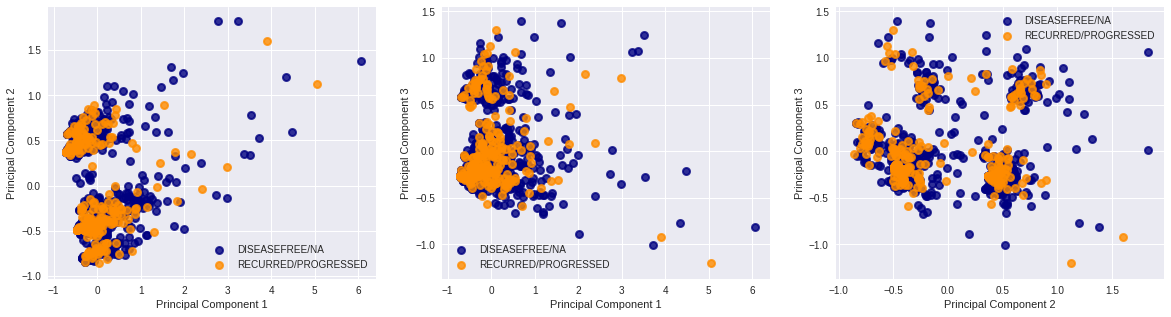

In [469]:
names = ['DISEASEFREE/NA', 'RECURRED/PROGRESSED']
plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

colors = ['navy', 'darkorange']
lw = 2

s1 = plt.subplot(131)
for color, i, name in zip(colors, [0, 1], names):
    s1.scatter(X_r_dfs_all[Y_dfs_all == i, 0], X_r_dfs_all[Y_dfs_all == i,1], color=color, alpha=.8, lw=lw,
                label=name)
s1.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s1.set_xlabel('Principal Component 1')
s1.set_ylabel('Principal Component 2')

s2 = plt.subplot(132)
for color, i, name in zip(colors, [0, 1], names):
    s2.scatter(X_r_dfs_all[Y_dfs_all == i, 0], X_r_dfs_all[Y_dfs_all == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s2.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s2.set_xlabel('Principal Component 1')
s2.set_ylabel('Principal Component 3')

s3 = plt.subplot(133)
for color, i, name in zip(colors, [0, 1], names):
    s3.scatter(X_r_dfs_all[Y_dfs_all == i, 1], X_r_dfs_all[Y_dfs_all == i,2], color=color, alpha=.8, lw=lw,
                label=name)
s3.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA of Mutated Genes in SCC Patients')
s3.set_xlabel('Principal Component 2')
s3.set_ylabel('Principal Component 3')

plt.show()